In [1014]:
# Packages

import pandas as pd
import numpy as np
import string
import re


import matplotlib.pyplot as plt
import seaborn as sns



from collections import Counter
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

from sklearn import metrics

import scipy

# Loading Training Dataset

In [979]:
#Loading all three data_sets:  train, dev and test

cols = ['ID', 'tweet', 'label', 'intensity']
def load_data(path):
    data_set=pd.read_csv(path, header=None, sep='\t', names=cols, index_col=0)
    return(data_set)
    
def concat(a,f,s,j):
    data= pd.concat([a, f, s, j])
    data.reset_index(inplace=True)
    return(data)

anger_tr= load_data('anger_train.txt')
fear_tr= load_data('fear_train.txt')
sad_tr= load_data('sad_train.txt')
joy_tr= load_data('joy_train.txt')

anger_test= load_data('anger_test.txt')
fear_test= load_data('fear_test.txt')
sad_test= load_data('sadness_test.txt')
joy_test= load_data('joy_test.txt')

anger_dev= load_data('anger_dev.txt')
fear_dev= load_data('fear_dev.txt')
sad_dev= load_data('sad_dev.txt')
joy_dev= load_data('joy_dev.txt')


#Concatenating to single data_frame
data_tr=concat(anger_tr,fear_tr,sad_tr,joy_tr)
data_test=concat(anger_test,fear_test,sad_test,joy_test)
data_dev=concat(anger_dev,fear_dev,sad_dev,joy_dev)



In [980]:
#Need not to worry on missing values or duplicates
data_tr.info()

num_duplicates = data_tr.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         3613 non-null   int64  
 1   tweet      3613 non-null   object 
 2   label      3613 non-null   object 
 3   intensity  3613 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 113.0+ KB
Number of duplicate rows: 0


In [981]:
data_tr.info()

num_duplicates = data_tr.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         3613 non-null   int64  
 1   tweet      3613 non-null   object 
 2   label      3613 non-null   object 
 3   intensity  3613 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 113.0+ KB
Number of duplicate rows: 0


In [982]:
data_tr.info()

num_duplicates = data_tr.duplicated().sum()

print("Number of duplicate rows:", num_duplicates)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         3613 non-null   int64  
 1   tweet      3613 non-null   object 
 2   label      3613 non-null   object 
 3   intensity  3613 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 113.0+ KB
Number of duplicate rows: 0


In [983]:
anger_tr.head()

,tweet,label,intensity
ID,,,
10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
10001,So my Indian Uber driver just called someone t...,anger,0.896
10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [985]:
fear_tr.head()

,tweet,label,intensity
ID,,,
20000,I feel like I am drowning. #depression #anxiet...,fear,0.979
20001,I get so nervous even thinking about talking t...,fear,0.979
20002,I lost my blinders .... #panic,fear,0.975
20003,I feel like I am drowning. #depression #falur...,fear,0.938
20004,This is the scariest American Horror Story out...,fear,0.938


In [954]:
sad_tr.head()

,tweet,label,intensity
ID,,,
40000,Depression sucks! #depression,sadness,0.958
40001,Feeling worthless as always #depression,sadness,0.958
40002,Feeling worthless as always,sadness,0.958
40003,My #Fibromyalgia has been really bad lately wh...,sadness,0.946
40004,Im think ima lay in bed all day and sulk. Life...,sadness,0.934


In [955]:
joy_tr.head()

,tweet,label,intensity
ID,,,
30000,Just got back from seeing @GaryDelaney in Burs...,joy,0.980
30001,Oh dear an evening of absolute hilarity I don'...,joy,0.958
30002,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,0.940
30003,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0.938
30004,I feel so blessed to work with the family that...,joy,0.938


# Analyzing the data_set

In [986]:
#Appending wor_count to data_frame
data_tr['word_count'] = data_tr['tweet'].str.split().apply(len)


In [987]:
# Appending emoji_count for data_frame 

import regex as re

def count_emojis(text):
    emoji_pattern = re.compile(r'\p{So}')
    emojis = emoji_pattern.findall(text)
    return len(emojis)

data_tr['emoji_count'] = data_tr['tweet'].apply(count_emojis)


In [988]:
# Displaying only tweets which contain emojis

data_tr[data_tr['emoji_count']>=1]

,ID,tweet,label,intensity,word_count,emoji_count
6,10006,When you've still got a whole season of Wentwo...,anger,0.875,25,2
14,10014,Fuking fuming 😤,anger,0.854,3,1
20,10020,Making my buddy cry !! Bitch wait for revenge 🤗👌🏻,anger,0.812,10,2
22,10022,I got a NO RESPONSE again from an #irate custo...,anger,0.812,22,2
27,10027,Bloody parking ticket 😒💸 #fuming,anger,0.792,5,2
...,...,...,...,...,...,...
3587,30797,half day tuhday but nah for glee 😭,joy,0.125,8,1
3592,30802,Wanted to get him a cake with sparkling candle...,joy,0.104,16,2
3599,30809,Studying the phases of oscillation. How jovial...,joy,0.100,8,2
3603,30813,But i'll be a pity. 🐑,joy,0.083,6,1


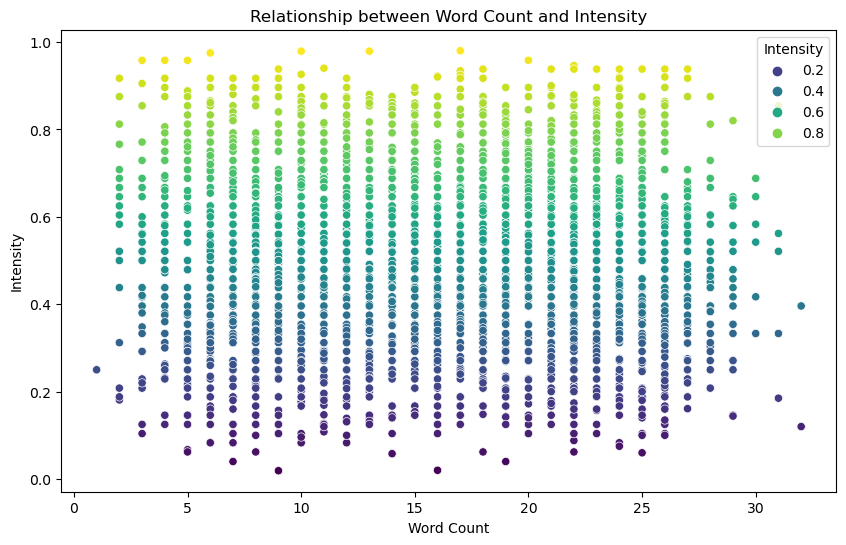

In [989]:
# Relationship between Word Count and Intensity

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_tr, x='word_count', y='intensity', hue='intensity', palette='viridis')
plt.title('Relationship between Word Count and Intensity')
plt.xlabel('Word Count')
plt.ylabel('Intensity')
plt.legend(title='Intensity')
plt.show()


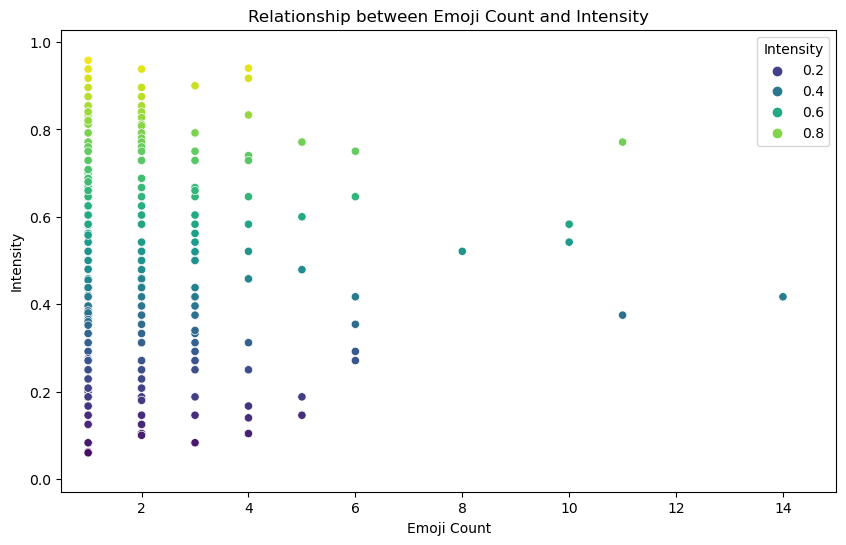

Count of tweets having emojis count = 0 and intensity >= 0.8: 212
Count of tweets having emojis count = 1 and intensity >= 0.8: 21
Count of tweets having emojis count = 2 and intensity >= 0.8: 14
Count of tweets having emojis count = 3 and intensity >= 0.8: 1
Count of tweets having emojis count = 4 and intensity >= 0.8: 3
Count of tweets having emojis count = 5 and intensity >= 0.8: 0
Count of tweets having emojis count = 6 and intensity >= 0.8: 0
Count of tweets having emojis count = 7 and intensity >= 0.8: 0
Count of tweets having emojis count = 8 and intensity >= 0.8: 0
Count of tweets having emojis count = 9 and intensity >= 0.8: 0
Count of tweets having emojis count = 10 and intensity >= 0.8: 0
Count of tweets having emojis count = 11 and intensity >= 0.8: 0
Count of tweets having emojis count = 12 and intensity >= 0.8: 0
Count of tweets having emojis count = 13 and intensity >= 0.8: 0


In [990]:
#Relationship between Emoji Count and Intensity

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_tr, x='emoji_count', y='intensity', hue='intensity', palette='viridis')
plt.title('Relationship between Emoji Count and Intensity')
plt.xlabel('Emoji Count')
plt.ylabel('Intensity')
plt.legend(title='Intensity')

plt.xlim(0.5, 15)

plt.show()


for i in range(14):
    count = len(data_tr[(data_tr['intensity'] >= 0.8) & (data_tr['emoji_count'] == i)])
    print(f'Count of tweets having emojis count = {i} and intensity >= 0.8: {count}')


In [991]:
# Count occurrences of words starting with '@' for all tweets
mentions = data_tr['tweet'].str.findall(r'@(\w+)').explode().value_counts()

# Get top 10 mentions across all tweets
top_mentions = mentions.head(10)

print("Top 10 mentions across all tweets:")
print(top_mentions)


Top 10 mentions across all tweets:
tweet
realDonaldTrump    21
HillaryClinton     16
ManUtd              6
MHChat              5
CNN                 5
jeremycorbyn        4
billclinton         4
StephenKing         4
Airbnb              4
donlemon            4
Name: count, dtype: int64


/Users/pratheekkb/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


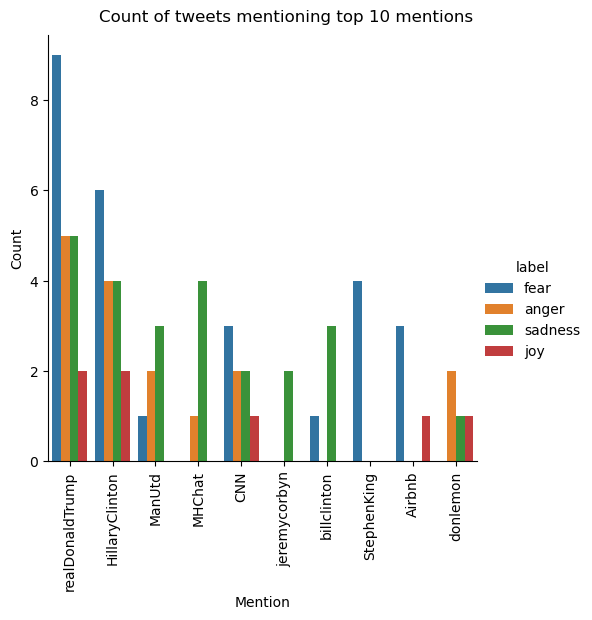

In [992]:
# Count of tweets of top counted mentions of twitter handle  in the tweets



top_mentions = all_tweets_mentions.head(10).index.tolist()


mention_counts = pd.DataFrame(columns=['mention', 'label', 'count'])


for mention in top_mentions:
   
    mention_tweets = data_tr[data_tr['tweet'].str.contains(f'@{mention}', case=False)]
    
    mention_count = mention_tweets['label'].value_counts().reset_index()
    mention_count.columns = ['label', 'count']
    mention_count['mention'] = mention
    
   
    mention_counts = pd.concat([mention_counts, mention_count], ignore_index=True)


g = sns.catplot(
    data=mention_counts, kind="bar",
    x="mention", y="count", hue="label", alpha=1, height=5
)  

g.set_axis_labels("Mention", "Count")
g.fig.suptitle('Count of tweets mentioning top 10 mentions', y=1.02)

plt.xticks(rotation=90)

plt.show()


In [993]:
def func(data_frame,label):
    join_text = ' '.join(data_frame[data_frame['label'] == label]['tweet'].values)
    return join_text

join_text_fear = func(data_tr, 'fear')
join_text_anger = func(data_tr, 'anger')
join_text_joy = func(data_tr, 'joy')
join_text_sadness = func(data_tr, 'sadness')

print(type(join_text_fear))

<class 'str'>


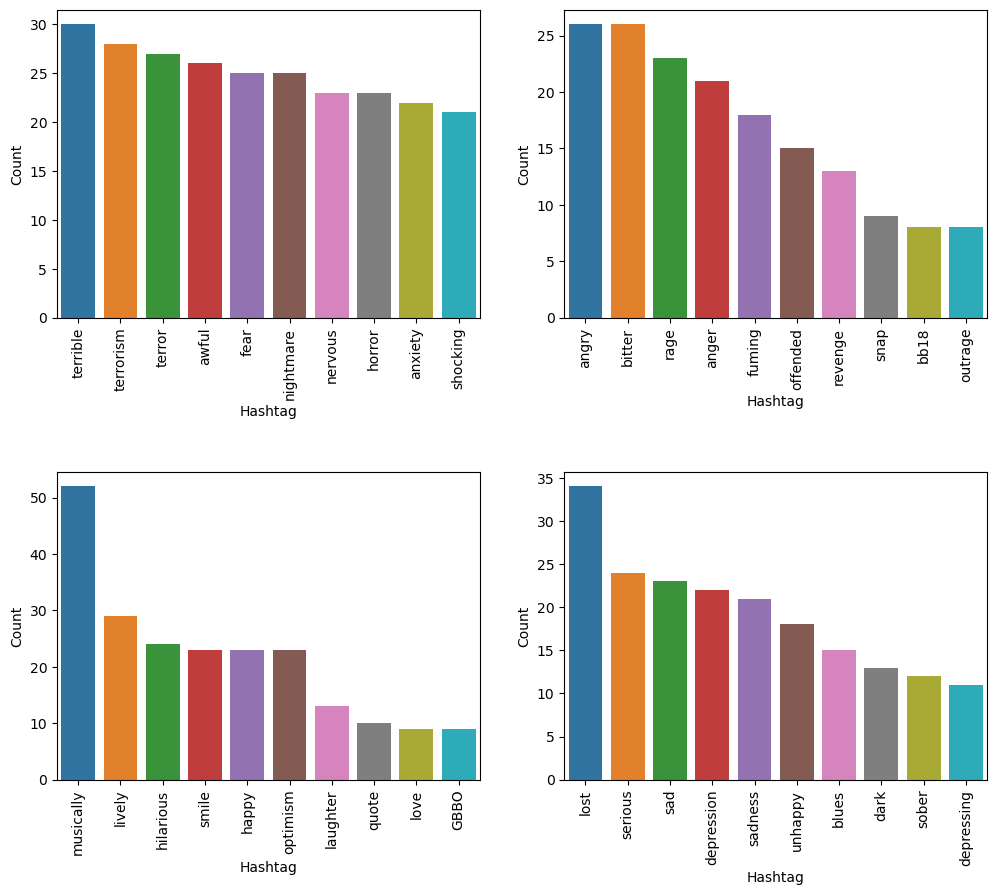

In [967]:
def plot_top_hashtags(data, emotion, ax):
    hashtag_counter = Counter(tag for tag_list in data[data['label'] == emotion]['tweet'].str.findall(r'#(\w+)') for tag in tag_list)
    most_common_hashtags = hashtag_counter.most_common(10)
    df_hashtags = pd.DataFrame(most_common_hashtags, columns=["Hashtag", "Count"])
    sns.barplot(data=df_hashtags, x="Hashtag", y="Count", ax=ax)  
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

plot_top_hashtags(data_tr, 'fear', ax1)
plot_top_hashtags(data_tr, 'anger', ax2)
plot_top_hashtags(data_tr, 'joy', ax3)
plot_top_hashtags(data_tr, 'sadness', ax4)

plt.show()


# Linear Regression

## Data Preprocessing  and training 

In [999]:
# tokenizing, stemming, and removing @mentions and digits

tok = WordPunctTokenizer()
mentions = r'@[A-Za-z0-9_]+'
link = r'https?://[A-Za-z0-9./]+'
digits = r'[0-9]+'
combined_pat = r'|'.join((mentions, link, digits))

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def tweet_cleaner(data_frame):

    clean_data = []
    for index, row in data_frame.iterrows():
        
        stripped = re.sub(combined_pat, '', row.tweet)
    
        lower_case = stripped.lower()
       
        words = tok.tokenize(lower_case)
        
        stemmed_words = [stemmer.stem(w) for w in words if w not in stop_words]
        
        cleaned_text = ' '.join(stemmed_words).strip()
        clean_data.append(cleaned_text)
        
   
    return clean_data


In [1007]:
data_tr['clean_tweet'] = tweet_cleaner(data_tr)
data_dev['clean_tweet'] = tweet_cleaner(data_dev)
data_test['clean_tweet'] = tweet_cleaner(data_test)


In [1008]:
# Creating  TF-IDF vectorizer
vectorizer_tfidf = TfidfVectorizer(max_features=1000)


X_train_tfidf = vectorizer_tfidf.fit_transform(data_tr['clean_tweet'])

X_dev_tfidf = vectorizer_tfidf.transform(data_dev['clean_tweet'])

X_test_tfidf = vectorizer_tfidf.transform(data_test['clean_tweet'])


## Linear Regression on  train_data

In [1011]:
# Train the linear regression model on the training data

tfidf_linreg = LinearRegression().fit(X_train_tfidf, data_tr['intensity'])


In [1012]:
# Finding the mean_average and root_mean_square_error

y_dev_pred = tfidf_linreg.predict(X_dev_tfidf)
y_test_pred = tfidf_linreg.predict(X_test_tfidf)

# Calculate evaluation metrics for the development dataset
dev_mae = metrics.mean_absolute_error(data_dev['intensity'], y_dev_pred)
dev_rmse = np.sqrt(metrics.mean_squared_error(data_dev['intensity'], y_dev_pred))

# Calculate evaluation metrics for the test dataset
test_mae = metrics.mean_absolute_error(data_test['intensity'], y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(data_test['intensity'], y_test_pred))

# Predict intensity values for the training data
y_train_pred = tfidf_linreg.predict(X_train_tfidf)

# Calculate evaluation metrics for the training dataset
train_mae = metrics.mean_absolute_error(data_tr['intensity'], y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(data_tr['intensity'], y_train_pred))

print("Training set MAE:", train_mae)
print("Training set RMSE:", train_rmse)
print("Development set MAE:", dev_mae)
print("Development set RMSE:", dev_rmse)
print("Test set MAE:", test_mae)
print("Test set RMSE:", test_rmse)


Training set MAE: 0.1016030839216506
Training set RMSE: 0.12966912365003777
Development set MAE: 0.1610832789431812
Development set RMSE: 0.20396868757715578
Test set MAE: 0.1551697631315329
Test set RMSE: 0.1957257675284456


## Cross-validation

In [1015]:


combined_data = pd.concat([data_tr, data_dev])


X_combined_tfidf = vectorizer_tfidf.fit_transform(combined_data['clean_tweet'])


y_combined = combined_data['intensity']


linreg_model = LinearRegression()


cv_results = cross_validate(linreg_model, X_combined_tfidf, y_combined, cv=5, scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error'])

cv_mae_scores = -cv_results['test_neg_mean_absolute_error']
cv_rmse_scores = -cv_results['test_neg_root_mean_squared_error']


mean_cv_mae = np.mean(cv_mae_scores)
mean_cv_rmse = np.mean(cv_rmse_scores)
std_cv_mae = np.std(cv_mae_scores)
std_cv_rmse = np.std(cv_rmse_scores)

print("Cross-validation results:")
print("Mean MAE:", mean_cv_mae)
print("Mean RMSE:", mean_cv_rmse)
print("MAE standard deviation:", std_cv_mae)
print("RMSE standard deviation:", std_cv_rmse)


Cross-validation results:
Mean MAE: 0.20911764438923672
Mean RMSE: 0.2595122095139446
MAE standard deviation: 0.012876544478155618
RMSE standard deviation: 0.011858597097001627


## Regularization(Ridge Regression)

In [1023]:

from sklearn.linear_model import Ridge


ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train_tfidf, data_tr['intensity'])



y_dev_pred = ridge_reg.predict(X_dev_tfidf)
y_test_pred = ridge_reg.predict(X_test_tfidf)

dev_mae = metrics.mean_absolute_error(data_dev['intensity'], y_dev_pred)
dev_rmse = np.sqrt(metrics.mean_squared_error(data_dev['intensity'], y_dev_pred))


test_mae = metrics.mean_absolute_error(data_test['intensity'], y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(data_test['intensity'], y_test_pred))

y_train_pred = ridge_reg.predict(X_train_tfidf)


train_mae = metrics.mean_absolute_error(data_tr['intensity'], y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(data_tr['intensity'], y_train_pred))

print("Training set MAE:", train_mae)
print("Training set RMSE:", train_rmse)
print("Development set MAE:", dev_mae)
print("Development set RMSE:", dev_rmse)
print("Test set MAE:", test_mae)
print("Test set RMSE:", test_rmse)


Training set MAE: 0.11987721601398758
Training set RMSE: 0.14989138325101412
Development set MAE: 0.1378312974094084
Development set RMSE: 0.17214955602107976
Test set MAE: 0.14211698824337313
Test set RMSE: 0.17603804366203507


# Neural Network

In [875]:

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.activations import sigmoid



X_train = data_tr['tweet']  
y_train = data_tr['intensity']  

X_dev = data_dev['tweet']
y_dev = data_dev['intensity']

X_test = data_test['tweet']
y_test = data_test['intensity']


max_words = 10000  


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)


X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_dev_sequences = tokenizer.texts_to_sequences(X_dev)
X_test_sequences = tokenizer.texts_to_sequences(X_test)


max_len = max(len(sequence) for sequence in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len)
X_dev_padded = pad_sequences(X_dev_sequences, maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len)


model = Sequential([
    Dense(64, activation=sigmoid, input_shape=(max_len,)),
    Dense(64, activation=sigmoid),
    Dense(1, activation=sigmoid) 
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Using Mean Squared Error (MSE) loss


model.fit(X_train_padded, y_train, epochs=10000, batch_size=50, validation_data=(X_dev_padded, y_dev))


loss, mae = model.evaluate(X_test_padded, y_test)


print("Test MAE:", mae)


Epoch 1/10000


/Users/pratheekkb/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0652 - mae: 0.2038 - val_loss: 0.0345 - val_mae: 0.1515
Epoch 2/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 0.0373 - mae: 0.1577 - val_loss: 0.0344 - val_mae: 0.1513
Epoch 3/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.0353 - mae: 0.1531 - val_loss: 0.0345 - val_mae: 0.1521
Epoch 4/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.0344 - mae: 0.1505 - val_loss: 0.0346 - val_mae: 0.1528
Epoch 5/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.0363 - mae: 0.1555 - val_loss: 0.0342 - val_mae: 0.1512
Epoch 6/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.0350 - mae: 0.1526 - val_loss: 0.0345 - val_mae: 0.1530
Epoch 7/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 0.0357 - mae: 0.1538 - val_loss: 0.0351 - val_mae: 0.1549
Epoch 8/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 0.0358 - mae: 0.1540 - val_loss: 0.0344 - val_mae: 0.1531
Epoch 9/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 957u

Epoch 54/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 0.0352 - mae: 0.1518 - val_loss: 0.0356 - val_mae: 0.1542
Epoch 55/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.0349 - mae: 0.1527 - val_loss: 0.0362 - val_mae: 0.1565
Epoch 56/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.0335 - mae: 0.1483 - val_loss: 0.0362 - val_mae: 0.1554
Epoch 57/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.0339 - mae: 0.1490 - val_loss: 0.0355 - val_mae: 0.1536
Epoch 58/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 0.0348 - mae: 0.1508 - val_loss: 0.0349 - val_mae: 0.1518
Epoch 59/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 0.0330 - mae: 0.1462 - val_loss: 0.0346 - val_mae: 0.1510
Epoch 60/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 0.0343 - mae: 0.1503 - val_loss: 0.0354 - val_mae: 0.1522
Epoch 61/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 0.0341 - mae: 0.1491 - val_loss: 0.0354 - val_mae: 0.1519
Epoch 62/10000
73/73 ━━━

Epoch 107/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0338 - mae: 0.1483 - val_loss: 0.0371 - val_mae: 0.1589
Epoch 108/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0324 - mae: 0.1447 - val_loss: 0.0390 - val_mae: 0.1630
Epoch 109/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0335 - mae: 0.1486 - val_loss: 0.0368 - val_mae: 0.1580
Epoch 110/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.0330 - mae: 0.1469 - val_loss: 0.0378 - val_mae: 0.1604
Epoch 111/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0325 - mae: 0.1456 - val_loss: 0.0362 - val_mae: 0.1574
Epoch 112/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0324 - mae: 0.1451 - val_loss: 0.0369 - val_mae: 0.1596
Epoch 113/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 0.0328 - mae: 0.1470 - val_loss: 0.0366 - val_mae: 0.1568
Epoch 114/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0307 - mae: 0.1406 - val_loss: 0.0368 - val_mae: 0.1574
Epoch 115/10000
73/73 ━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.0314 - mae: 0.1434 - val_loss: 0.0411 - val_mae: 0.1673
Epoch 212/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.0319 - mae: 0.1446 - val_loss: 0.0389 - val_mae: 0.1612
Epoch 213/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.0313 - mae: 0.1431 - val_loss: 0.0391 - val_mae: 0.1614
Epoch 214/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.0309 - mae: 0.1423 - val_loss: 0.0398 - val_mae: 0.1655
Epoch 215/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 0.0310 - mae: 0.1415 - val_loss: 0.0393 - val_mae: 0.1630
Epoch 216/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.0317 - mae: 0.1435 - val_loss: 0.0391 - val_mae: 0.1630
Epoch 217/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 0.0302 - mae: 0.1406 - val_loss: 0.0385 - val_mae: 0.1614
Epoch 218/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 0.0314 - mae: 0.1424 - val_loss: 0.0391 - val_mae: 0.1630
Epoch 219/10000
73/73 ━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0293 - mae: 0.1370 - val_loss: 0.0435 - val_mae: 0.1684
Epoch 316/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0295 - mae: 0.1381 - val_loss: 0.0434 - val_mae: 0.1707
Epoch 317/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.0289 - mae: 0.1368 - val_loss: 0.0437 - val_mae: 0.1707
Epoch 318/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.0289 - mae: 0.1366 - val_loss: 0.0431 - val_mae: 0.1680
Epoch 319/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0289 - mae: 0.1362 - val_loss: 0.0429 - val_mae: 0.1685
Epoch 320/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0288 - mae: 0.1364 - val_loss: 0.0427 - val_mae: 0.1686
Epoch 321/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0283 - mae: 0.1355 - val_loss: 0.0425 - val_mae: 0.1678
Epoch 322/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0291 - mae: 0.1369 - val_loss: 0.0420 - val_mae: 0.1681
Epoch 323/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0

Epoch 368/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.0287 - mae: 0.1356 - val_loss: 0.0440 - val_mae: 0.1719
Epoch 369/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.0266 - mae: 0.1297 - val_loss: 0.0439 - val_mae: 0.1701
Epoch 370/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.0269 - mae: 0.1315 - val_loss: 0.0425 - val_mae: 0.1668
Epoch 371/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.0276 - mae: 0.1342 - val_loss: 0.0422 - val_mae: 0.1676
Epoch 372/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0268 - mae: 0.1306 - val_loss: 0.0442 - val_mae: 0.1717
Epoch 373/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.0270 - mae: 0.1320 - val_loss: 0.0432 - val_mae: 0.1692
Epoch 374/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 0.0256 - mae: 0.1278 - val_loss: 0.0441 - val_mae: 0.1709
Epoch 375/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 0.0280 - mae: 0.1335 - val_loss: 0.0434 - val_mae: 0.1714
Epoch 376/10000
73

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 0.0263 - mae: 0.1279 - val_loss: 0.0452 - val_mae: 0.1729
Epoch 473/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.0257 - mae: 0.1275 - val_loss: 0.0460 - val_mae: 0.1751
Epoch 474/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.0272 - mae: 0.1304 - val_loss: 0.0452 - val_mae: 0.1722
Epoch 475/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 0.0259 - mae: 0.1281 - val_loss: 0.0450 - val_mae: 0.1697
Epoch 476/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 0.0256 - mae: 0.1264 - val_loss: 0.0467 - val_mae: 0.1741
Epoch 477/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.0260 - mae: 0.1285 - val_loss: 0.0456 - val_mae: 0.1711
Epoch 478/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.0259 - mae: 0.1268 - val_loss: 0.0453 - val_mae: 0.1723
Epoch 479/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.0260 - mae: 0.1276 - val_loss: 0.0459 - val_mae: 0.1719
Epoch 480/10000
73/73 ━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 0.0241 - mae: 0.1221 - val_loss: 0.0476 - val_mae: 0.1752
Epoch 577/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.0242 - mae: 0.1234 - val_loss: 0.0474 - val_mae: 0.1759
Epoch 578/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 0.0229 - mae: 0.1194 - val_loss: 0.0468 - val_mae: 0.1749
Epoch 579/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 0.0240 - mae: 0.1216 - val_loss: 0.0484 - val_mae: 0.1776
Epoch 580/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.0240 - mae: 0.1215 - val_loss: 0.0474 - val_mae: 0.1757
Epoch 581/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 0.0238 - mae: 0.1222 - val_loss: 0.0472 - val_mae: 0.1767
Epoch 582/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 0.0253 - mae: 0.1251 - val_loss: 0.0483 - val_mae: 0.1775
Epoch 583/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 0.0250 - mae: 0.1233 - val_loss: 0.0485 - val_mae: 0.1783
Epoch 584/10000
73/73 ━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 0.0224 - mae: 0.1189 - val_loss: 0.0462 - val_mae: 0.1743
Epoch 681/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 0.0230 - mae: 0.1196 - val_loss: 0.0465 - val_mae: 0.1742
Epoch 682/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 0.0221 - mae: 0.1172 - val_loss: 0.0460 - val_mae: 0.1721
Epoch 683/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 0.0221 - mae: 0.1182 - val_loss: 0.0480 - val_mae: 0.1775
Epoch 684/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.0229 - mae: 0.1187 - val_loss: 0.0477 - val_mae: 0.1756
Epoch 685/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 0.0225 - mae: 0.1186 - val_loss: 0.0460 - val_mae: 0.1732
Epoch 686/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 0.0216 - mae: 0.1160 - val_loss: 0.0468 - val_mae: 0.1747
Epoch 687/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.0219 - mae: 0.1174 - val_loss: 0.0463 - val_mae: 0.1730
Epoch 688/10000
73/73 ━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0205 - mae: 0.1115 - val_loss: 0.0469 - val_mae: 0.1748
Epoch 785/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0201 - mae: 0.1110 - val_loss: 0.0475 - val_mae: 0.1763
Epoch 786/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0205 - mae: 0.1113 - val_loss: 0.0484 - val_mae: 0.1773
Epoch 787/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0210 - mae: 0.1129 - val_loss: 0.0476 - val_mae: 0.1748
Epoch 788/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0213 - mae: 0.1143 - val_loss: 0.0471 - val_mae: 0.1759
Epoch 789/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.0209 - mae: 0.1126 - val_loss: 0.0476 - val_mae: 0.1763
Epoch 790/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0206 - mae: 0.1112 - val_loss: 0.0479 - val_mae: 0.1760
Epoch 791/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.0199 - mae: 0.1094 - val_loss: 0.0481 - val_mae: 0.1748
Epoch 792/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.0193 - mae: 0.1088 - val_loss: 0.0461 - val_mae: 0.1746
Epoch 889/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 0.0195 - mae: 0.1087 - val_loss: 0.0479 - val_mae: 0.1771
Epoch 890/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.0202 - mae: 0.1121 - val_loss: 0.0468 - val_mae: 0.1735
Epoch 891/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.0204 - mae: 0.1110 - val_loss: 0.0473 - val_mae: 0.1756
Epoch 892/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 0.0189 - mae: 0.1067 - val_loss: 0.0494 - val_mae: 0.1795
Epoch 893/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.0190 - mae: 0.1067 - val_loss: 0.0482 - val_mae: 0.1767
Epoch 894/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 0.0189 - mae: 0.1075 - val_loss: 0.0479 - val_mae: 0.1784
Epoch 895/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 0.0201 - mae: 0.1094 - val_loss: 0.0486 - val_mae: 0.1775
Epoch 896/10000
73/73 ━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.0175 - mae: 0.1022 - val_loss: 0.0466 - val_mae: 0.1767
Epoch 993/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.0179 - mae: 0.1037 - val_loss: 0.0497 - val_mae: 0.1827
Epoch 994/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.0171 - mae: 0.0999 - val_loss: 0.0474 - val_mae: 0.1789
Epoch 995/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.0181 - mae: 0.1039 - val_loss: 0.0483 - val_mae: 0.1785
Epoch 996/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 0.0178 - mae: 0.1028 - val_loss: 0.0473 - val_mae: 0.1763
Epoch 997/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 0.0183 - mae: 0.1038 - val_loss: 0.0482 - val_mae: 0.1782
Epoch 998/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 0.0175 - mae: 0.1007 - val_loss: 0.0479 - val_mae: 0.1765
Epoch 999/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.0183 - mae: 0.1023 - val_loss: 0.0485 - val_mae: 0.1787
Epoch 1000/10000
73/73 ━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.0170 - mae: 0.1004 - val_loss: 0.0501 - val_mae: 0.1790
Epoch 1097/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.0162 - mae: 0.0979 - val_loss: 0.0496 - val_mae: 0.1790
Epoch 1098/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 0.0167 - mae: 0.0989 - val_loss: 0.0501 - val_mae: 0.1790
Epoch 1099/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.0167 - mae: 0.0996 - val_loss: 0.0503 - val_mae: 0.1816
Epoch 1100/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.0166 - mae: 0.0991 - val_loss: 0.0501 - val_mae: 0.1822
Epoch 1101/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.0177 - mae: 0.1022 - val_loss: 0.0505 - val_mae: 0.1803
Epoch 1102/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 0.0169 - mae: 0.0997 - val_loss: 0.0500 - val_mae: 0.1795
Epoch 1103/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.0173 - mae: 0.1011 - val_loss: 0.0481 - val_mae: 0.1758
Epoch 1104/10000
73/73 ━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.0165 - mae: 0.0979 - val_loss: 0.0472 - val_mae: 0.1754
Epoch 1201/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.0167 - mae: 0.0981 - val_loss: 0.0473 - val_mae: 0.1746
Epoch 1202/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0159 - mae: 0.0954 - val_loss: 0.0475 - val_mae: 0.1748
Epoch 1203/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.0161 - mae: 0.0971 - val_loss: 0.0459 - val_mae: 0.1709
Epoch 1204/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0163 - mae: 0.0978 - val_loss: 0.0467 - val_mae: 0.1740
Epoch 1205/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0169 - mae: 0.0986 - val_loss: 0.0461 - val_mae: 0.1734
Epoch 1206/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0166 - mae: 0.0988 - val_loss: 0.0469 - val_mae: 0.1757
Epoch 1207/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.0168 - mae: 0.0985 - val_loss: 0.0457 - val_mae: 0.1732
Epoch 1208/10000
73/73 ━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.0151 - mae: 0.0934 - val_loss: 0.0483 - val_mae: 0.1750
Epoch 1305/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.0165 - mae: 0.0967 - val_loss: 0.0495 - val_mae: 0.1787
Epoch 1306/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.0155 - mae: 0.0944 - val_loss: 0.0503 - val_mae: 0.1794
Epoch 1307/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 0.0155 - mae: 0.0946 - val_loss: 0.0476 - val_mae: 0.1748
Epoch 1308/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 0.0155 - mae: 0.0945 - val_loss: 0.0476 - val_mae: 0.1751
Epoch 1309/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.0164 - mae: 0.0966 - val_loss: 0.0474 - val_mae: 0.1755
Epoch 1310/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.0164 - mae: 0.0976 - val_loss: 0.0471 - val_mae: 0.1739
Epoch 1311/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0164 - mae: 0.0969 - val_loss: 0.0473 - val_mae: 0.1745
Epoch 1312/10000
73/73 ━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 0.0157 - mae: 0.0951 - val_loss: 0.0501 - val_mae: 0.1831
Epoch 1409/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.0154 - mae: 0.0926 - val_loss: 0.0497 - val_mae: 0.1789
Epoch 1410/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.0162 - mae: 0.0966 - val_loss: 0.0496 - val_mae: 0.1816
Epoch 1411/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.0153 - mae: 0.0938 - val_loss: 0.0484 - val_mae: 0.1793
Epoch 1412/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.0148 - mae: 0.0916 - val_loss: 0.0486 - val_mae: 0.1785
Epoch 1413/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 0.0150 - mae: 0.0931 - val_loss: 0.0488 - val_mae: 0.1804
Epoch 1414/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.0147 - mae: 0.0906 - val_loss: 0.0500 - val_mae: 0.1828
Epoch 1415/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.0150 - mae: 0.0934 - val_loss: 0.0506 - val_mae: 0.1848
Epoch 1416/10000
73/73 ━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0140 - mae: 0.0885 - val_loss: 0.0487 - val_mae: 0.1768
Epoch 1513/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.0138 - mae: 0.0876 - val_loss: 0.0489 - val_mae: 0.1762
Epoch 1514/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0137 - mae: 0.0885 - val_loss: 0.0490 - val_mae: 0.1771
Epoch 1515/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.0139 - mae: 0.0889 - val_loss: 0.0481 - val_mae: 0.1749
Epoch 1516/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.0131 - mae: 0.0853 - val_loss: 0.0496 - val_mae: 0.1794
Epoch 1517/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 0.0140 - mae: 0.0887 - val_loss: 0.0494 - val_mae: 0.1774
Epoch 1518/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0137 - mae: 0.0877 - val_loss: 0.0496 - val_mae: 0.1774
Epoch 1519/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.0136 - mae: 0.0872 - val_loss: 0.0485 - val_mae: 0.1756
Epoch 1520/10000
73/73 ━━━━━━━━

Epoch 1616/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.0130 - mae: 0.0855 - val_loss: 0.0490 - val_mae: 0.1764
Epoch 1617/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.0134 - mae: 0.0866 - val_loss: 0.0457 - val_mae: 0.1694
Epoch 1618/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.0134 - mae: 0.0865 - val_loss: 0.0495 - val_mae: 0.1778
Epoch 1619/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 0.0135 - mae: 0.0881 - val_loss: 0.0505 - val_mae: 0.1800
Epoch 1620/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 0.0133 - mae: 0.0854 - val_loss: 0.0480 - val_mae: 0.1745
Epoch 1621/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 0.0136 - mae: 0.0858 - val_loss: 0.0484 - val_mae: 0.1749
Epoch 1622/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.0139 - mae: 0.0879 - val_loss: 0.0484 - val_mae: 0.1777
Epoch 1623/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.0134 - mae: 0.0865 - val_loss: 0.0485 - val_mae: 0.1766
Epoch 16

Epoch 1668/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.0127 - mae: 0.0842 - val_loss: 0.0519 - val_mae: 0.1821
Epoch 1669/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 0.0122 - mae: 0.0822 - val_loss: 0.0512 - val_mae: 0.1795
Epoch 1670/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.0126 - mae: 0.0835 - val_loss: 0.0500 - val_mae: 0.1778
Epoch 1671/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.0136 - mae: 0.0865 - val_loss: 0.0493 - val_mae: 0.1767
Epoch 1672/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.0123 - mae: 0.0819 - val_loss: 0.0506 - val_mae: 0.1799
Epoch 1673/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.0126 - mae: 0.0829 - val_loss: 0.0506 - val_mae: 0.1802
Epoch 1674/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 0.0122 - mae: 0.0830 - val_loss: 0.0487 - val_mae: 0.1757
Epoch 1675/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 0.0121 - mae: 0.0814 - val_loss: 0.0490 - val_mae: 0.1774
Epoch 16

Epoch 1720/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 0.0127 - mae: 0.0840 - val_loss: 0.0525 - val_mae: 0.1834
Epoch 1721/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.0127 - mae: 0.0838 - val_loss: 0.0545 - val_mae: 0.1853
Epoch 1722/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.0126 - mae: 0.0830 - val_loss: 0.0568 - val_mae: 0.1897
Epoch 1723/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 0.0136 - mae: 0.0867 - val_loss: 0.0538 - val_mae: 0.1838
Epoch 1724/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 0.0129 - mae: 0.0844 - val_loss: 0.0546 - val_mae: 0.1860
Epoch 1725/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.0129 - mae: 0.0844 - val_loss: 0.0546 - val_mae: 0.1859
Epoch 1726/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 0.0136 - mae: 0.0866 - val_loss: 0.0539 - val_mae: 0.1830
Epoch 1727/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.0133 - mae: 0.0867 - val_loss: 0.0542 - val_mae: 0.1856
Epoch 17

Epoch 1772/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.0118 - mae: 0.0808 - val_loss: 0.0556 - val_mae: 0.1893
Epoch 1773/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.0123 - mae: 0.0816 - val_loss: 0.0524 - val_mae: 0.1830
Epoch 1774/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 0.0127 - mae: 0.0829 - val_loss: 0.0509 - val_mae: 0.1792
Epoch 1775/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.0128 - mae: 0.0834 - val_loss: 0.0543 - val_mae: 0.1892
Epoch 1776/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 0.0130 - mae: 0.0840 - val_loss: 0.0520 - val_mae: 0.1835
Epoch 1777/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.0129 - mae: 0.0845 - val_loss: 0.0519 - val_mae: 0.1820
Epoch 1778/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 0.0128 - mae: 0.0845 - val_loss: 0.0523 - val_mae: 0.1838
Epoch 1779/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.0134 - mae: 0.0849 - val_loss: 0.0524 - val_mae: 0.1824
Epoch 17

Epoch 1824/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.0124 - mae: 0.0825 - val_loss: 0.0529 - val_mae: 0.1830
Epoch 1825/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 0.0128 - mae: 0.0833 - val_loss: 0.0534 - val_mae: 0.1824
Epoch 1826/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.0127 - mae: 0.0824 - val_loss: 0.0521 - val_mae: 0.1786
Epoch 1827/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 0.0124 - mae: 0.0823 - val_loss: 0.0516 - val_mae: 0.1782
Epoch 1828/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.0128 - mae: 0.0830 - val_loss: 0.0521 - val_mae: 0.1796
Epoch 1829/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 0.0130 - mae: 0.0828 - val_loss: 0.0524 - val_mae: 0.1804
Epoch 1830/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.0126 - mae: 0.0828 - val_loss: 0.0543 - val_mae: 0.1837
Epoch 1831/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 0.0124 - mae: 0.0817 - val_loss: 0.0529 - val_mae: 0.1826
Epoch 18

Epoch 1876/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.0128 - mae: 0.0838 - val_loss: 0.0506 - val_mae: 0.1766
Epoch 1877/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.0125 - mae: 0.0816 - val_loss: 0.0518 - val_mae: 0.1796
Epoch 1878/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.0129 - mae: 0.0829 - val_loss: 0.0538 - val_mae: 0.1834
Epoch 1879/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.0133 - mae: 0.0843 - val_loss: 0.0543 - val_mae: 0.1856
Epoch 1880/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.0138 - mae: 0.0872 - val_loss: 0.0514 - val_mae: 0.1795
Epoch 1881/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.0133 - mae: 0.0858 - val_loss: 0.0547 - val_mae: 0.1881
Epoch 1882/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 0.0136 - mae: 0.0852 - val_loss: 0.0532 - val_mae: 0.1862
Epoch 1883/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.0136 - mae: 0.0865 - val_loss: 0.0531 - val_mae: 0.1839
Epoch 18

Epoch 1928/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 0.0125 - mae: 0.0829 - val_loss: 0.0510 - val_mae: 0.1805
Epoch 1929/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 0.0123 - mae: 0.0821 - val_loss: 0.0494 - val_mae: 0.1757
Epoch 1930/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 0.0126 - mae: 0.0827 - val_loss: 0.0511 - val_mae: 0.1819
Epoch 1931/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.0126 - mae: 0.0831 - val_loss: 0.0518 - val_mae: 0.1846
Epoch 1932/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0130 - mae: 0.0833 - val_loss: 0.0532 - val_mae: 0.1859
Epoch 1933/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.0130 - mae: 0.0843 - val_loss: 0.0504 - val_mae: 0.1773
Epoch 1934/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.0125 - mae: 0.0839 - val_loss: 0.0492 - val_mae: 0.1762
Epoch 1935/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 0.0126 - mae: 0.0836 - val_loss: 0.0488 - val_mae: 0.1765
Epoch 1936

Epoch 1980/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 0.0109 - mae: 0.0777 - val_loss: 0.0498 - val_mae: 0.1777
Epoch 1981/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0109 - mae: 0.0771 - val_loss: 0.0500 - val_mae: 0.1806
Epoch 1982/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.0122 - mae: 0.0827 - val_loss: 0.0501 - val_mae: 0.1791
Epoch 1983/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0113 - mae: 0.0780 - val_loss: 0.0511 - val_mae: 0.1801
Epoch 1984/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.0117 - mae: 0.0790 - val_loss: 0.0518 - val_mae: 0.1810
Epoch 1985/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.0127 - mae: 0.0833 - val_loss: 0.0506 - val_mae: 0.1783
Epoch 1986/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.0123 - mae: 0.0812 - val_loss: 0.0505 - val_mae: 0.1794
Epoch 1987/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.0114 - mae: 0.0785 - val_loss: 0.0495 - val_mae: 0.1774
Epoch 1988/1

Epoch 2032/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 0.0115 - mae: 0.0779 - val_loss: 0.0534 - val_mae: 0.1828
Epoch 2033/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.0111 - mae: 0.0774 - val_loss: 0.0530 - val_mae: 0.1812
Epoch 2034/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 0.0112 - mae: 0.0770 - val_loss: 0.0536 - val_mae: 0.1837
Epoch 2035/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.0115 - mae: 0.0777 - val_loss: 0.0544 - val_mae: 0.1854
Epoch 2036/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.0113 - mae: 0.0767 - val_loss: 0.0540 - val_mae: 0.1859
Epoch 2037/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.0113 - mae: 0.0776 - val_loss: 0.0529 - val_mae: 0.1851
Epoch 2038/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 0.0113 - mae: 0.0785 - val_loss: 0.0531 - val_mae: 0.1834
Epoch 2039/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 0.0114 - mae: 0.0775 - val_loss: 0.0531 - val_mae: 0.1829
Epoch 20

Epoch 2084/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 0.0112 - mae: 0.0769 - val_loss: 0.0541 - val_mae: 0.1856
Epoch 2085/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.0109 - mae: 0.0765 - val_loss: 0.0543 - val_mae: 0.1854
Epoch 2086/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.0115 - mae: 0.0788 - val_loss: 0.0541 - val_mae: 0.1854
Epoch 2087/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.0123 - mae: 0.0823 - val_loss: 0.0550 - val_mae: 0.1860
Epoch 2088/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.0117 - mae: 0.0785 - val_loss: 0.0529 - val_mae: 0.1829
Epoch 2089/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.0130 - mae: 0.0827 - val_loss: 0.0528 - val_mae: 0.1814
Epoch 2090/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 0.0117 - mae: 0.0798 - val_loss: 0.0536 - val_mae: 0.1840
Epoch 2091/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.0113 - mae: 0.0782 - val_loss: 0.0528 - val_mae: 0.1832
Epoch 20

Epoch 2136/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.0105 - mae: 0.0751 - val_loss: 0.0544 - val_mae: 0.1864
Epoch 2137/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.0115 - mae: 0.0787 - val_loss: 0.0548 - val_mae: 0.1878
Epoch 2138/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.0115 - mae: 0.0793 - val_loss: 0.0524 - val_mae: 0.1835
Epoch 2139/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 0.0115 - mae: 0.0788 - val_loss: 0.0522 - val_mae: 0.1828
Epoch 2140/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.0110 - mae: 0.0761 - val_loss: 0.0513 - val_mae: 0.1796
Epoch 2141/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.0111 - mae: 0.0772 - val_loss: 0.0508 - val_mae: 0.1793
Epoch 2142/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 0.0110 - mae: 0.0765 - val_loss: 0.0524 - val_mae: 0.1830
Epoch 2143/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.0112 - mae: 0.0778 - val_loss: 0.0514 - val_mae: 0.1822
Epoch 21

Epoch 2188/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.0126 - mae: 0.0820 - val_loss: 0.0526 - val_mae: 0.1852
Epoch 2189/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.0117 - mae: 0.0795 - val_loss: 0.0531 - val_mae: 0.1862
Epoch 2190/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 0.0118 - mae: 0.0803 - val_loss: 0.0521 - val_mae: 0.1839
Epoch 2191/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.0116 - mae: 0.0803 - val_loss: 0.0545 - val_mae: 0.1891
Epoch 2192/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.0119 - mae: 0.0808 - val_loss: 0.0532 - val_mae: 0.1860
Epoch 2193/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 0.0124 - mae: 0.0814 - val_loss: 0.0518 - val_mae: 0.1828
Epoch 2194/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.0118 - mae: 0.0804 - val_loss: 0.0531 - val_mae: 0.1854
Epoch 2195/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.0117 - mae: 0.0798 - val_loss: 0.0527 - val_mae: 0.1849
Epoch 21

Epoch 2240/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.0112 - mae: 0.0774 - val_loss: 0.0498 - val_mae: 0.1767
Epoch 2241/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.0109 - mae: 0.0768 - val_loss: 0.0504 - val_mae: 0.1803
Epoch 2242/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.0123 - mae: 0.0793 - val_loss: 0.0495 - val_mae: 0.1761
Epoch 2243/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.0110 - mae: 0.0773 - val_loss: 0.0498 - val_mae: 0.1782
Epoch 2244/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 0.0120 - mae: 0.0813 - val_loss: 0.0478 - val_mae: 0.1722
Epoch 2245/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.0117 - mae: 0.0786 - val_loss: 0.0503 - val_mae: 0.1780
Epoch 2246/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.0113 - mae: 0.0785 - val_loss: 0.0493 - val_mae: 0.1753
Epoch 2247/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.0112 - mae: 0.0784 - val_loss: 0.0482 - val_mae: 0.1747
Epoch 22

Epoch 2292/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 0.0120 - mae: 0.0800 - val_loss: 0.0494 - val_mae: 0.1766
Epoch 2293/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 0.0128 - mae: 0.0830 - val_loss: 0.0506 - val_mae: 0.1791
Epoch 2294/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.0124 - mae: 0.0817 - val_loss: 0.0511 - val_mae: 0.1777
Epoch 2295/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.0126 - mae: 0.0814 - val_loss: 0.0515 - val_mae: 0.1794
Epoch 2296/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.0115 - mae: 0.0793 - val_loss: 0.0516 - val_mae: 0.1797
Epoch 2297/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.0113 - mae: 0.0775 - val_loss: 0.0517 - val_mae: 0.1802
Epoch 2298/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 0.0115 - mae: 0.0792 - val_loss: 0.0512 - val_mae: 0.1790
Epoch 2299/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.0112 - mae: 0.0783 - val_loss: 0.0515 - val_mae: 0.1775
Epoch 23

Epoch 2344/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.0105 - mae: 0.0746 - val_loss: 0.0506 - val_mae: 0.1784
Epoch 2345/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 0.0112 - mae: 0.0776 - val_loss: 0.0520 - val_mae: 0.1823
Epoch 2346/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.0107 - mae: 0.0753 - val_loss: 0.0511 - val_mae: 0.1808
Epoch 2347/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.0118 - mae: 0.0789 - val_loss: 0.0525 - val_mae: 0.1807
Epoch 2348/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 0.0109 - mae: 0.0767 - val_loss: 0.0515 - val_mae: 0.1777
Epoch 2349/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.0107 - mae: 0.0744 - val_loss: 0.0508 - val_mae: 0.1790
Epoch 2350/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.0107 - mae: 0.0755 - val_loss: 0.0522 - val_mae: 0.1803
Epoch 2351/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 0.0110 - mae: 0.0766 - val_loss: 0.0532 - val_mae: 0.1831
Epoch 23

Epoch 2396/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.0109 - mae: 0.0762 - val_loss: 0.0543 - val_mae: 0.1873
Epoch 2397/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 0.0108 - mae: 0.0761 - val_loss: 0.0522 - val_mae: 0.1847
Epoch 2398/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 0.0109 - mae: 0.0768 - val_loss: 0.0528 - val_mae: 0.1850
Epoch 2399/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 0.0106 - mae: 0.0761 - val_loss: 0.0535 - val_mae: 0.1878
Epoch 2400/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.0104 - mae: 0.0743 - val_loss: 0.0533 - val_mae: 0.1844
Epoch 2401/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.0104 - mae: 0.0751 - val_loss: 0.0512 - val_mae: 0.1818
Epoch 2402/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 0.0105 - mae: 0.0747 - val_loss: 0.0508 - val_mae: 0.1806
Epoch 2403/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.0107 - mae: 0.0763 - val_loss: 0.0523 - val_mae: 0.1831
Epoch 2

Epoch 2448/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0108 - mae: 0.0753 - val_loss: 0.0529 - val_mae: 0.1864
Epoch 2449/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0109 - mae: 0.0757 - val_loss: 0.0510 - val_mae: 0.1826
Epoch 2450/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.0105 - mae: 0.0744 - val_loss: 0.0514 - val_mae: 0.1833
Epoch 2451/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.0101 - mae: 0.0727 - val_loss: 0.0523 - val_mae: 0.1856
Epoch 2452/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 0.0106 - mae: 0.0752 - val_loss: 0.0538 - val_mae: 0.1872
Epoch 2453/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0104 - mae: 0.0745 - val_loss: 0.0534 - val_mae: 0.1864
Epoch 2454/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.0109 - mae: 0.0758 - val_loss: 0.0531 - val_mae: 0.1869
Epoch 2455/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0114 - mae: 0.0770 - val_loss: 0.0538 - val_mae: 0.1871
Epoch 2456/10000

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.0105 - mae: 0.0748 - val_loss: 0.0547 - val_mae: 0.1886
Epoch 2553/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.0107 - mae: 0.0751 - val_loss: 0.0532 - val_mae: 0.1832
Epoch 2554/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.0105 - mae: 0.0744 - val_loss: 0.0524 - val_mae: 0.1818
Epoch 2555/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.0112 - mae: 0.0759 - val_loss: 0.0544 - val_mae: 0.1858
Epoch 2556/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.0109 - mae: 0.0759 - val_loss: 0.0543 - val_mae: 0.1882
Epoch 2557/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 0.0108 - mae: 0.0747 - val_loss: 0.0546 - val_mae: 0.1862
Epoch 2558/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 0.0106 - mae: 0.0746 - val_loss: 0.0543 - val_mae: 0.1879
Epoch 2559/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.0100 - mae: 0.0725 - val_loss: 0.0525 - val_mae: 0.1845
Epoch 2560/10000
73/73 ━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.0093 - mae: 0.0694 - val_loss: 0.0526 - val_mae: 0.1854
Epoch 2657/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0100 - mae: 0.0722 - val_loss: 0.0533 - val_mae: 0.1850
Epoch 2658/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.0094 - mae: 0.0714 - val_loss: 0.0521 - val_mae: 0.1853
Epoch 2659/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.0100 - mae: 0.0724 - val_loss: 0.0532 - val_mae: 0.1860
Epoch 2660/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.0104 - mae: 0.0743 - val_loss: 0.0523 - val_mae: 0.1820
Epoch 2661/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.0098 - mae: 0.0716 - val_loss: 0.0532 - val_mae: 0.1848
Epoch 2662/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0100 - mae: 0.0720 - val_loss: 0.0527 - val_mae: 0.1837
Epoch 2663/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0102 - mae: 0.0732 - val_loss: 0.0536 - val_mae: 0.1874
Epoch 2664/10000
73/73 ━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.0107 - mae: 0.0732 - val_loss: 0.0586 - val_mae: 0.1957
Epoch 2761/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 0.0108 - mae: 0.0753 - val_loss: 0.0579 - val_mae: 0.1945
Epoch 2762/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.0098 - mae: 0.0708 - val_loss: 0.0587 - val_mae: 0.1959
Epoch 2763/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 0.0096 - mae: 0.0703 - val_loss: 0.0567 - val_mae: 0.1919
Epoch 2764/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.0098 - mae: 0.0714 - val_loss: 0.0561 - val_mae: 0.1891
Epoch 2765/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.0093 - mae: 0.0700 - val_loss: 0.0572 - val_mae: 0.1912
Epoch 2766/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 0.0096 - mae: 0.0711 - val_loss: 0.0561 - val_mae: 0.1894
Epoch 2767/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 0.0102 - mae: 0.0726 - val_loss: 0.0561 - val_mae: 0.1915
Epoch 2768/10000
73/73 ━━

Epoch 2812/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.0096 - mae: 0.0711 - val_loss: 0.0538 - val_mae: 0.1851
Epoch 2813/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.0101 - mae: 0.0723 - val_loss: 0.0542 - val_mae: 0.1872
Epoch 2814/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.0100 - mae: 0.0727 - val_loss: 0.0542 - val_mae: 0.1849
Epoch 2815/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 0.0100 - mae: 0.0725 - val_loss: 0.0528 - val_mae: 0.1829
Epoch 2816/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.0093 - mae: 0.0704 - val_loss: 0.0539 - val_mae: 0.1851
Epoch 2817/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.0099 - mae: 0.0720 - val_loss: 0.0534 - val_mae: 0.1824
Epoch 2818/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 0.0105 - mae: 0.0739 - val_loss: 0.0530 - val_mae: 0.1831
Epoch 2819/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.0105 - mae: 0.0727 - val_loss: 0.0538 - val_mae: 0.1837
Epoch 28

Epoch 2864/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.0100 - mae: 0.0718 - val_loss: 0.0556 - val_mae: 0.1859
Epoch 2865/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.0100 - mae: 0.0732 - val_loss: 0.0542 - val_mae: 0.1842
Epoch 2866/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.0101 - mae: 0.0722 - val_loss: 0.0567 - val_mae: 0.1872
Epoch 2867/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.0103 - mae: 0.0734 - val_loss: 0.0557 - val_mae: 0.1865
Epoch 2868/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.0098 - mae: 0.0720 - val_loss: 0.0571 - val_mae: 0.1880
Epoch 2869/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 0.0100 - mae: 0.0725 - val_loss: 0.0551 - val_mae: 0.1857
Epoch 2870/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 0.0090 - mae: 0.0682 - val_loss: 0.0545 - val_mae: 0.1850
Epoch 2871/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 0.0099 - mae: 0.0721 - val_loss: 0.0559 - val_mae: 0.1880
Epoch 28

Epoch 2916/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.0091 - mae: 0.0678 - val_loss: 0.0562 - val_mae: 0.1882
Epoch 2917/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 0.0100 - mae: 0.0727 - val_loss: 0.0551 - val_mae: 0.1869
Epoch 2918/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.0096 - mae: 0.0701 - val_loss: 0.0548 - val_mae: 0.1879
Epoch 2919/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.0099 - mae: 0.0721 - val_loss: 0.0548 - val_mae: 0.1865
Epoch 2920/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 0.0099 - mae: 0.0717 - val_loss: 0.0541 - val_mae: 0.1857
Epoch 2921/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 0.0097 - mae: 0.0715 - val_loss: 0.0539 - val_mae: 0.1839
Epoch 2922/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.0094 - mae: 0.0703 - val_loss: 0.0538 - val_mae: 0.1834
Epoch 2923/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.0092 - mae: 0.0696 - val_loss: 0.0550 - val_mae: 0.1859
Epoch 29

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091 - mae: 0.0677 - val_loss: 0.0544 - val_mae: 0.1825
Epoch 2969/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091 - mae: 0.0676 - val_loss: 0.0535 - val_mae: 0.1841
Epoch 2970/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0090 - mae: 0.0676 - val_loss: 0.0534 - val_mae: 0.1833
Epoch 2971/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0087 - mae: 0.0669 - val_loss: 0.0534 - val_mae: 0.1835
Epoch 2972/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0094 - mae: 0.0700 - val_loss: 0.0531 - val_mae: 0.1836
Epoch 2973/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0097 - mae: 0.0704 - val_loss: 0.0533 - val_mae: 0.1826
Epoch 2974/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0089 - mae: 0.0682 - val_loss: 0.0515 - val_mae: 0.1795
Epoch 2975/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0099 - mae: 0.0718 - val_loss: 0.0525 - val_mae: 0.1825
Epoch 2976/10000
73/73 ━━━━━━━━━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 0.0097 - mae: 0.0694 - val_loss: 0.0528 - val_mae: 0.1852
Epoch 3073/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.0106 - mae: 0.0734 - val_loss: 0.0517 - val_mae: 0.1848
Epoch 3074/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.0102 - mae: 0.0719 - val_loss: 0.0531 - val_mae: 0.1853
Epoch 3075/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.0097 - mae: 0.0705 - val_loss: 0.0528 - val_mae: 0.1833
Epoch 3076/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.0102 - mae: 0.0728 - val_loss: 0.0506 - val_mae: 0.1818
Epoch 3077/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.0102 - mae: 0.0723 - val_loss: 0.0510 - val_mae: 0.1826
Epoch 3078/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.0100 - mae: 0.0711 - val_loss: 0.0510 - val_mae: 0.1823
Epoch 3079/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.0100 - mae: 0.0721 - val_loss: 0.0509 - val_mae: 0.1803
Epoch 3080/10000
73/73 ━━

Epoch 3124/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.0085 - mae: 0.0665 - val_loss: 0.0506 - val_mae: 0.1802
Epoch 3125/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.0097 - mae: 0.0701 - val_loss: 0.0483 - val_mae: 0.1765
Epoch 3126/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 0.0092 - mae: 0.0685 - val_loss: 0.0500 - val_mae: 0.1783
Epoch 3127/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.0100 - mae: 0.0714 - val_loss: 0.0509 - val_mae: 0.1807
Epoch 3128/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 0.0093 - mae: 0.0688 - val_loss: 0.0516 - val_mae: 0.1813
Epoch 3129/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.0092 - mae: 0.0687 - val_loss: 0.0519 - val_mae: 0.1827
Epoch 3130/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.0098 - mae: 0.0713 - val_loss: 0.0503 - val_mae: 0.1788
Epoch 3131/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 0.0093 - mae: 0.0686 - val_loss: 0.0512 - val_mae: 0.1791
Epoch 31

Epoch 3176/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 0.0091 - mae: 0.0684 - val_loss: 0.0531 - val_mae: 0.1841
Epoch 3177/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.0095 - mae: 0.0698 - val_loss: 0.0535 - val_mae: 0.1871
Epoch 3178/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 0.0100 - mae: 0.0719 - val_loss: 0.0511 - val_mae: 0.1785
Epoch 3179/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 0.0089 - mae: 0.0680 - val_loss: 0.0511 - val_mae: 0.1776
Epoch 3180/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.0095 - mae: 0.0698 - val_loss: 0.0494 - val_mae: 0.1777
Epoch 3181/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.0096 - mae: 0.0706 - val_loss: 0.0517 - val_mae: 0.1824
Epoch 3182/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.0094 - mae: 0.0691 - val_loss: 0.0511 - val_mae: 0.1824
Epoch 3183/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 0.0095 - mae: 0.0687 - val_loss: 0.0513 - val_mae: 0.1813
Epoch 31

Epoch 3228/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.0090 - mae: 0.0685 - val_loss: 0.0542 - val_mae: 0.1890
Epoch 3229/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 0.0092 - mae: 0.0681 - val_loss: 0.0530 - val_mae: 0.1853
Epoch 3230/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0086 - mae: 0.0672 - val_loss: 0.0544 - val_mae: 0.1876
Epoch 3231/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095 - mae: 0.0694 - val_loss: 0.0530 - val_mae: 0.1830
Epoch 3232/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 0.0095 - mae: 0.0703 - val_loss: 0.0526 - val_mae: 0.1821
Epoch 3233/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 0.0096 - mae: 0.0705 - val_loss: 0.0527 - val_mae: 0.1831
Epoch 3234/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0090 - mae: 0.0682 - val_loss: 0.0505 - val_mae: 0.1784
Epoch 3235/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0093 - mae: 0.0690 - val_loss: 0.0509 - val_mae: 0.1795
Epoch 3236/10000

Epoch 3280/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 0.0087 - mae: 0.0654 - val_loss: 0.0488 - val_mae: 0.1762
Epoch 3281/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.0090 - mae: 0.0685 - val_loss: 0.0468 - val_mae: 0.1715
Epoch 3282/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 0.0086 - mae: 0.0674 - val_loss: 0.0481 - val_mae: 0.1739
Epoch 3283/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.0083 - mae: 0.0654 - val_loss: 0.0482 - val_mae: 0.1750
Epoch 3284/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 0.0086 - mae: 0.0662 - val_loss: 0.0507 - val_mae: 0.1798
Epoch 3285/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.0086 - mae: 0.0662 - val_loss: 0.0516 - val_mae: 0.1804
Epoch 3286/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 0.0084 - mae: 0.0654 - val_loss: 0.0517 - val_mae: 0.1793
Epoch 3287/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.0082 - mae: 0.0644 - val_loss: 0.0496 - val_mae: 0.1775
Epoch 32

Epoch 3332/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.0096 - mae: 0.0704 - val_loss: 0.0513 - val_mae: 0.1816
Epoch 3333/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 0.0094 - mae: 0.0696 - val_loss: 0.0513 - val_mae: 0.1824
Epoch 3334/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 0.0094 - mae: 0.0701 - val_loss: 0.0507 - val_mae: 0.1805
Epoch 3335/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - loss: 0.0090 - mae: 0.0680 - val_loss: 0.0523 - val_mae: 0.1854
Epoch 3336/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 0.0091 - mae: 0.0682 - val_loss: 0.0520 - val_mae: 0.1846
Epoch 3337/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.0097 - mae: 0.0699 - val_loss: 0.0530 - val_mae: 0.1850
Epoch 3338/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 0.0089 - mae: 0.0675 - val_loss: 0.0522 - val_mae: 0.1828
Epoch 3339/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.0096 - mae: 0.0703 - val_loss: 0.0504 - val_mae: 0.1799
Epoch 33

Epoch 3384/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 0.0094 - mae: 0.0686 - val_loss: 0.0531 - val_mae: 0.1831
Epoch 3385/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.0085 - mae: 0.0654 - val_loss: 0.0546 - val_mae: 0.1848
Epoch 3386/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.0086 - mae: 0.0662 - val_loss: 0.0542 - val_mae: 0.1843
Epoch 3387/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.0083 - mae: 0.0651 - val_loss: 0.0562 - val_mae: 0.1882
Epoch 3388/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.0093 - mae: 0.0676 - val_loss: 0.0549 - val_mae: 0.1859
Epoch 3389/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.0090 - mae: 0.0667 - val_loss: 0.0550 - val_mae: 0.1854
Epoch 3390/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.0084 - mae: 0.0650 - val_loss: 0.0541 - val_mae: 0.1839
Epoch 3391/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 0.0087 - mae: 0.0662 - val_loss: 0.0570 - val_mae: 0.1891
Epoch 33

Epoch 3436/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 0.0096 - mae: 0.0687 - val_loss: 0.0502 - val_mae: 0.1806
Epoch 3437/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.0092 - mae: 0.0679 - val_loss: 0.0497 - val_mae: 0.1764
Epoch 3438/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 0.0086 - mae: 0.0658 - val_loss: 0.0515 - val_mae: 0.1809
Epoch 3439/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.0090 - mae: 0.0664 - val_loss: 0.0502 - val_mae: 0.1778
Epoch 3440/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 0.0093 - mae: 0.0687 - val_loss: 0.0509 - val_mae: 0.1794
Epoch 3441/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.0084 - mae: 0.0659 - val_loss: 0.0518 - val_mae: 0.1825
Epoch 3442/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.0087 - mae: 0.0669 - val_loss: 0.0505 - val_mae: 0.1780
Epoch 3443/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.0089 - mae: 0.0673 - val_loss: 0.0522 - val_mae: 0.1804
Epoch 34

Epoch 3488/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.0082 - mae: 0.0653 - val_loss: 0.0555 - val_mae: 0.1863
Epoch 3489/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.0088 - mae: 0.0678 - val_loss: 0.0531 - val_mae: 0.1805
Epoch 3490/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 0.0080 - mae: 0.0644 - val_loss: 0.0526 - val_mae: 0.1792
Epoch 3491/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 0.0083 - mae: 0.0647 - val_loss: 0.0514 - val_mae: 0.1766
Epoch 3492/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.0087 - mae: 0.0666 - val_loss: 0.0533 - val_mae: 0.1812
Epoch 3493/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 0.0091 - mae: 0.0679 - val_loss: 0.0530 - val_mae: 0.1809
Epoch 3494/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.0085 - mae: 0.0664 - val_loss: 0.0531 - val_mae: 0.1817
Epoch 3495/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.0091 - mae: 0.0684 - val_loss: 0.0526 - val_mae: 0.1814
Epoch 34

Epoch 3540/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 0.0088 - mae: 0.0665 - val_loss: 0.0519 - val_mae: 0.1793
Epoch 3541/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.0099 - mae: 0.0697 - val_loss: 0.0524 - val_mae: 0.1798
Epoch 3542/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.0089 - mae: 0.0673 - val_loss: 0.0504 - val_mae: 0.1754
Epoch 3543/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0093 - mae: 0.0690 - val_loss: 0.0536 - val_mae: 0.1833
Epoch 3544/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 0.0085 - mae: 0.0665 - val_loss: 0.0534 - val_mae: 0.1839
Epoch 3545/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 0.0089 - mae: 0.0674 - val_loss: 0.0511 - val_mae: 0.1798
Epoch 3546/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 0.0088 - mae: 0.0659 - val_loss: 0.0538 - val_mae: 0.1836
Epoch 3547/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.0090 - mae: 0.0680 - val_loss: 0.0531 - val_mae: 0.1844
Epoch 3548

Epoch 3592/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.0089 - mae: 0.0669 - val_loss: 0.0577 - val_mae: 0.1912
Epoch 3593/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.0082 - mae: 0.0648 - val_loss: 0.0583 - val_mae: 0.1927
Epoch 3594/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 0.0091 - mae: 0.0670 - val_loss: 0.0583 - val_mae: 0.1927
Epoch 3595/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.0097 - mae: 0.0698 - val_loss: 0.0574 - val_mae: 0.1911
Epoch 3596/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 0.0091 - mae: 0.0670 - val_loss: 0.0568 - val_mae: 0.1908
Epoch 3597/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.0088 - mae: 0.0663 - val_loss: 0.0549 - val_mae: 0.1867
Epoch 3598/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 0.0087 - mae: 0.0661 - val_loss: 0.0566 - val_mae: 0.1898
Epoch 3599/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.0081 - mae: 0.0647 - val_loss: 0.0552 - val_mae: 0.1874
Epoch 36

Epoch 3644/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.0084 - mae: 0.0649 - val_loss: 0.0590 - val_mae: 0.1926
Epoch 3645/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.0088 - mae: 0.0658 - val_loss: 0.0578 - val_mae: 0.1923
Epoch 3646/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 0.0091 - mae: 0.0685 - val_loss: 0.0570 - val_mae: 0.1905
Epoch 3647/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 0.0085 - mae: 0.0656 - val_loss: 0.0580 - val_mae: 0.1928
Epoch 3648/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.0088 - mae: 0.0658 - val_loss: 0.0574 - val_mae: 0.1903
Epoch 3649/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.0083 - mae: 0.0651 - val_loss: 0.0574 - val_mae: 0.1903
Epoch 3650/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.0088 - mae: 0.0663 - val_loss: 0.0567 - val_mae: 0.1892
Epoch 3651/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.0086 - mae: 0.0659 - val_loss: 0.0564 - val_mae: 0.1890
Epoch 36

Epoch 3696/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.0091 - mae: 0.0675 - val_loss: 0.0565 - val_mae: 0.1911
Epoch 3697/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.0087 - mae: 0.0667 - val_loss: 0.0567 - val_mae: 0.1915
Epoch 3698/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.0090 - mae: 0.0677 - val_loss: 0.0557 - val_mae: 0.1917
Epoch 3699/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.0097 - mae: 0.0701 - val_loss: 0.0543 - val_mae: 0.1883
Epoch 3700/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.0095 - mae: 0.0690 - val_loss: 0.0547 - val_mae: 0.1913
Epoch 3701/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 0.0095 - mae: 0.0695 - val_loss: 0.0547 - val_mae: 0.1912
Epoch 3702/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.0088 - mae: 0.0676 - val_loss: 0.0566 - val_mae: 0.1921
Epoch 3703/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.0089 - mae: 0.0672 - val_loss: 0.0555 - val_mae: 0.1888
Epoch 37

Epoch 3748/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.0085 - mae: 0.0668 - val_loss: 0.0527 - val_mae: 0.1829
Epoch 3749/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.0094 - mae: 0.0687 - val_loss: 0.0522 - val_mae: 0.1819
Epoch 3750/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.0097 - mae: 0.0701 - val_loss: 0.0518 - val_mae: 0.1806
Epoch 3751/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.0078 - mae: 0.0633 - val_loss: 0.0541 - val_mae: 0.1864
Epoch 3752/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.0092 - mae: 0.0676 - val_loss: 0.0530 - val_mae: 0.1820
Epoch 3753/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.0082 - mae: 0.0647 - val_loss: 0.0526 - val_mae: 0.1824
Epoch 3754/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.0081 - mae: 0.0644 - val_loss: 0.0538 - val_mae: 0.1850
Epoch 3755/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 0.0082 - mae: 0.0640 - val_loss: 0.0515 - val_mae: 0.1803
Epoch 37

Epoch 3800/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 0.0083 - mae: 0.0638 - val_loss: 0.0548 - val_mae: 0.1879
Epoch 3801/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.0095 - mae: 0.0703 - val_loss: 0.0537 - val_mae: 0.1860
Epoch 3802/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 0.0091 - mae: 0.0678 - val_loss: 0.0538 - val_mae: 0.1855
Epoch 3803/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.0085 - mae: 0.0649 - val_loss: 0.0533 - val_mae: 0.1852
Epoch 3804/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.0083 - mae: 0.0646 - val_loss: 0.0567 - val_mae: 0.1912
Epoch 3805/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.0081 - mae: 0.0626 - val_loss: 0.0570 - val_mae: 0.1934
Epoch 3806/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.0083 - mae: 0.0653 - val_loss: 0.0549 - val_mae: 0.1887
Epoch 3807/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 0.0089 - mae: 0.0668 - val_loss: 0.0548 - val_mae: 0.1888
Epoch 38

Epoch 3852/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.0081 - mae: 0.0633 - val_loss: 0.0526 - val_mae: 0.1845
Epoch 3853/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.0079 - mae: 0.0634 - val_loss: 0.0518 - val_mae: 0.1825
Epoch 3854/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 0.0083 - mae: 0.0640 - val_loss: 0.0517 - val_mae: 0.1844
Epoch 3855/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 0.0078 - mae: 0.0633 - val_loss: 0.0526 - val_mae: 0.1858
Epoch 3856/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.0080 - mae: 0.0632 - val_loss: 0.0525 - val_mae: 0.1844
Epoch 3857/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.0088 - mae: 0.0666 - val_loss: 0.0529 - val_mae: 0.1833
Epoch 3858/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.0084 - mae: 0.0653 - val_loss: 0.0531 - val_mae: 0.1854
Epoch 3859/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.0083 - mae: 0.0651 - val_loss: 0.0544 - val_mae: 0.1891
Epoch 38

Epoch 3904/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.0086 - mae: 0.0662 - val_loss: 0.0528 - val_mae: 0.1819
Epoch 3905/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 0.0092 - mae: 0.0682 - val_loss: 0.0552 - val_mae: 0.1855
Epoch 3906/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.0091 - mae: 0.0682 - val_loss: 0.0551 - val_mae: 0.1850
Epoch 3907/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.0085 - mae: 0.0652 - val_loss: 0.0551 - val_mae: 0.1862
Epoch 3908/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.0090 - mae: 0.0664 - val_loss: 0.0536 - val_mae: 0.1837
Epoch 3909/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.0087 - mae: 0.0659 - val_loss: 0.0558 - val_mae: 0.1871
Epoch 3910/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.0084 - mae: 0.0644 - val_loss: 0.0556 - val_mae: 0.1880
Epoch 3911/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.0088 - mae: 0.0660 - val_loss: 0.0560 - val_mae: 0.1876
Epoch 39

Epoch 3956/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 0.0081 - mae: 0.0637 - val_loss: 0.0536 - val_mae: 0.1829
Epoch 3957/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.0089 - mae: 0.0661 - val_loss: 0.0540 - val_mae: 0.1848
Epoch 3958/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.0083 - mae: 0.0653 - val_loss: 0.0534 - val_mae: 0.1837
Epoch 3959/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 0.0083 - mae: 0.0643 - val_loss: 0.0535 - val_mae: 0.1840
Epoch 3960/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.0089 - mae: 0.0665 - val_loss: 0.0539 - val_mae: 0.1838
Epoch 3961/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.0086 - mae: 0.0643 - val_loss: 0.0548 - val_mae: 0.1847
Epoch 3962/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.0082 - mae: 0.0633 - val_loss: 0.0537 - val_mae: 0.1828
Epoch 3963/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.0079 - mae: 0.0626 - val_loss: 0.0547 - val_mae: 0.1852
Epoch 39

Epoch 4008/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 0.0080 - mae: 0.0621 - val_loss: 0.0569 - val_mae: 0.1908
Epoch 4009/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 0.0084 - mae: 0.0644 - val_loss: 0.0555 - val_mae: 0.1882
Epoch 4010/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.0083 - mae: 0.0646 - val_loss: 0.0543 - val_mae: 0.1862
Epoch 4011/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 0.0082 - mae: 0.0632 - val_loss: 0.0556 - val_mae: 0.1904
Epoch 4012/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.0082 - mae: 0.0624 - val_loss: 0.0577 - val_mae: 0.1938
Epoch 4013/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.0078 - mae: 0.0616 - val_loss: 0.0561 - val_mae: 0.1905
Epoch 4014/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 0.0076 - mae: 0.0618 - val_loss: 0.0556 - val_mae: 0.1906
Epoch 4015/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.0080 - mae: 0.0630 - val_loss: 0.0563 - val_mae: 0.1905
Epoch 40

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 0.0090 - mae: 0.0659 - val_loss: 0.0535 - val_mae: 0.1869
Epoch 4113/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.0091 - mae: 0.0678 - val_loss: 0.0542 - val_mae: 0.1889
Epoch 4114/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.0086 - mae: 0.0654 - val_loss: 0.0542 - val_mae: 0.1885
Epoch 4115/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.0085 - mae: 0.0654 - val_loss: 0.0540 - val_mae: 0.1886
Epoch 4116/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0079 - mae: 0.0623 - val_loss: 0.0532 - val_mae: 0.1870
Epoch 4117/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0082 - mae: 0.0643 - val_loss: 0.0538 - val_mae: 0.1864
Epoch 4118/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0086 - mae: 0.0640 - val_loss: 0.0517 - val_mae: 0.1852
Epoch 4119/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0079 - mae: 0.0613 - val_loss: 0.0527 - val_mae: 0.1867
Epoch 4120/10000
73/73 ━━━━━━━━━━

Epoch 4216/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 0.0076 - mae: 0.0604 - val_loss: 0.0531 - val_mae: 0.1882
Epoch 4217/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.0079 - mae: 0.0618 - val_loss: 0.0548 - val_mae: 0.1914
Epoch 4218/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0081 - mae: 0.0619 - val_loss: 0.0532 - val_mae: 0.1880
Epoch 4219/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.0082 - mae: 0.0624 - val_loss: 0.0537 - val_mae: 0.1888
Epoch 4220/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.0079 - mae: 0.0636 - val_loss: 0.0544 - val_mae: 0.1893
Epoch 4221/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.0078 - mae: 0.0614 - val_loss: 0.0517 - val_mae: 0.1866
Epoch 4222/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.0081 - mae: 0.0622 - val_loss: 0.0536 - val_mae: 0.1884
Epoch 4223/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.0080 - mae: 0.0625 - val_loss: 0.0529 - val_mae: 0.1869
Epoch 4224

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.0080 - mae: 0.0633 - val_loss: 0.0558 - val_mae: 0.1905
Epoch 4321/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 0.0084 - mae: 0.0650 - val_loss: 0.0565 - val_mae: 0.1887
Epoch 4322/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079 - mae: 0.0637 - val_loss: 0.0570 - val_mae: 0.1898
Epoch 4323/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0082 - mae: 0.0637 - val_loss: 0.0556 - val_mae: 0.1885
Epoch 4324/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 0.0081 - mae: 0.0636 - val_loss: 0.0560 - val_mae: 0.1907
Epoch 4325/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.0086 - mae: 0.0651 - val_loss: 0.0560 - val_mae: 0.1907
Epoch 4326/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.0085 - mae: 0.0649 - val_loss: 0.0560 - val_mae: 0.1905
Epoch 4327/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0082 - mae: 0.0639 - val_loss: 0.0554 - val_mae: 0.1911
Epoch 4328/10000
73/73 ━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.0082 - mae: 0.0642 - val_loss: 0.0557 - val_mae: 0.1880
Epoch 4425/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.0089 - mae: 0.0655 - val_loss: 0.0544 - val_mae: 0.1865
Epoch 4426/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 0.0082 - mae: 0.0637 - val_loss: 0.0556 - val_mae: 0.1887
Epoch 4427/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.0079 - mae: 0.0621 - val_loss: 0.0555 - val_mae: 0.1881
Epoch 4428/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.0079 - mae: 0.0622 - val_loss: 0.0559 - val_mae: 0.1895
Epoch 4429/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.0080 - mae: 0.0624 - val_loss: 0.0556 - val_mae: 0.1898
Epoch 4430/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0069 - mae: 0.0577 - val_loss: 0.0557 - val_mae: 0.1908
Epoch 4431/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0.0077 - mae: 0.0616 - val_loss: 0.0561 - val_mae: 0.1920
Epoch 4432/10000
73/73 ━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0082 - mae: 0.0626 - val_loss: 0.0544 - val_mae: 0.1862
Epoch 4529/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.0084 - mae: 0.0637 - val_loss: 0.0547 - val_mae: 0.1861
Epoch 4530/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.0081 - mae: 0.0627 - val_loss: 0.0558 - val_mae: 0.1892
Epoch 4531/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.0081 - mae: 0.0635 - val_loss: 0.0565 - val_mae: 0.1915
Epoch 4532/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.0080 - mae: 0.0616 - val_loss: 0.0562 - val_mae: 0.1902
Epoch 4533/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 0.0081 - mae: 0.0625 - val_loss: 0.0548 - val_mae: 0.1886
Epoch 4534/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.0075 - mae: 0.0599 - val_loss: 0.0550 - val_mae: 0.1889
Epoch 4535/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 0.0080 - mae: 0.0615 - val_loss: 0.0544 - val_mae: 0.1876
Epoch 4536/10000
73/73 ━━━━

Epoch 4580/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.0078 - mae: 0.0624 - val_loss: 0.0546 - val_mae: 0.1882
Epoch 4581/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 0.0080 - mae: 0.0620 - val_loss: 0.0534 - val_mae: 0.1877
Epoch 4582/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 0.0077 - mae: 0.0606 - val_loss: 0.0549 - val_mae: 0.1900
Epoch 4583/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.0073 - mae: 0.0594 - val_loss: 0.0549 - val_mae: 0.1882
Epoch 4584/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 0.0074 - mae: 0.0601 - val_loss: 0.0554 - val_mae: 0.1883
Epoch 4585/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.0078 - mae: 0.0613 - val_loss: 0.0548 - val_mae: 0.1858
Epoch 4586/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 0.0076 - mae: 0.0599 - val_loss: 0.0559 - val_mae: 0.1886
Epoch 4587/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 0.0073 - mae: 0.0592 - val_loss: 0.0537 - val_mae: 0.1834
Epoch 45

Epoch 4632/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.0079 - mae: 0.0620 - val_loss: 0.0556 - val_mae: 0.1893
Epoch 4633/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 0.0076 - mae: 0.0612 - val_loss: 0.0563 - val_mae: 0.1873
Epoch 4634/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.0073 - mae: 0.0598 - val_loss: 0.0568 - val_mae: 0.1927
Epoch 4635/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.0081 - mae: 0.0637 - val_loss: 0.0577 - val_mae: 0.1917
Epoch 4636/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.0076 - mae: 0.0615 - val_loss: 0.0578 - val_mae: 0.1937
Epoch 4637/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 0.0083 - mae: 0.0648 - val_loss: 0.0571 - val_mae: 0.1911
Epoch 4638/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 0.0076 - mae: 0.0610 - val_loss: 0.0589 - val_mae: 0.1961
Epoch 4639/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 0.0075 - mae: 0.0607 - val_loss: 0.0568 - val_mae: 0.1912
Epoch 46

Epoch 4684/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.0075 - mae: 0.0594 - val_loss: 0.0563 - val_mae: 0.1909
Epoch 4685/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 0.0078 - mae: 0.0610 - val_loss: 0.0568 - val_mae: 0.1899
Epoch 4686/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.0072 - mae: 0.0596 - val_loss: 0.0569 - val_mae: 0.1903
Epoch 4687/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.0079 - mae: 0.0620 - val_loss: 0.0579 - val_mae: 0.1918
Epoch 4688/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 0.0073 - mae: 0.0598 - val_loss: 0.0562 - val_mae: 0.1894
Epoch 4689/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 0.0084 - mae: 0.0642 - val_loss: 0.0576 - val_mae: 0.1925
Epoch 4690/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 0.0081 - mae: 0.0625 - val_loss: 0.0573 - val_mae: 0.1933
Epoch 4691/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 0.0076 - mae: 0.0605 - val_loss: 0.0549 - val_mae: 0.1895
Epoch 46

Epoch 4736/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0077 - mae: 0.0608 - val_loss: 0.0549 - val_mae: 0.1897
Epoch 4737/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0082 - mae: 0.0608 - val_loss: 0.0571 - val_mae: 0.1928
Epoch 4738/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0074 - mae: 0.0586 - val_loss: 0.0544 - val_mae: 0.1894
Epoch 4739/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.0071 - mae: 0.0583 - val_loss: 0.0543 - val_mae: 0.1892
Epoch 4740/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0079 - mae: 0.0595 - val_loss: 0.0546 - val_mae: 0.1889
Epoch 4741/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.0077 - mae: 0.0605 - val_loss: 0.0539 - val_mae: 0.1876
Epoch 4742/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.0068 - mae: 0.0573 - val_loss: 0.0548 - val_mae: 0.1891
Epoch 4743/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.0082 - mae: 0.0615 - val_loss: 0.0545 - val_mae: 0.1902
Epoch 4744/10000

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.0078 - mae: 0.0617 - val_loss: 0.0583 - val_mae: 0.1961
Epoch 4789/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.0075 - mae: 0.0600 - val_loss: 0.0568 - val_mae: 0.1942
Epoch 4790/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.0078 - mae: 0.0608 - val_loss: 0.0589 - val_mae: 0.1950
Epoch 4791/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.0075 - mae: 0.0595 - val_loss: 0.0558 - val_mae: 0.1906
Epoch 4792/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076 - mae: 0.0606 - val_loss: 0.0563 - val_mae: 0.1917
Epoch 4793/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.0077 - mae: 0.0605 - val_loss: 0.0568 - val_mae: 0.1912
Epoch 4794/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 0.0072 - mae: 0.0591 - val_loss: 0.0581 - val_mae: 0.1957
Epoch 4795/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 0.0075 - mae: 0.0597 - val_loss: 0.0583 - val_mae: 0.1944
Epoch 4796/10000
73/73 ━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.0074 - mae: 0.0592 - val_loss: 0.0557 - val_mae: 0.1928
Epoch 4841/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 0.0074 - mae: 0.0595 - val_loss: 0.0540 - val_mae: 0.1902
Epoch 4842/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 0.0076 - mae: 0.0605 - val_loss: 0.0554 - val_mae: 0.1921
Epoch 4843/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0078 - mae: 0.0613 - val_loss: 0.0556 - val_mae: 0.1918
Epoch 4844/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.0074 - mae: 0.0602 - val_loss: 0.0560 - val_mae: 0.1940
Epoch 4845/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0081 - mae: 0.0617 - val_loss: 0.0555 - val_mae: 0.1919
Epoch 4846/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0072 - mae: 0.0594 - val_loss: 0.0564 - val_mae: 0.1902
Epoch 4847/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 0.0074 - mae: 0.0598 - val_loss: 0.0532 - val_mae: 0.1851
Epoch 4848/10000
73/73 ━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0072 - mae: 0.0580 - val_loss: 0.0539 - val_mae: 0.1878
Epoch 4893/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067 - mae: 0.0565 - val_loss: 0.0540 - val_mae: 0.1876
Epoch 4894/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070 - mae: 0.0574 - val_loss: 0.0541 - val_mae: 0.1878
Epoch 4895/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - mae: 0.0558 - val_loss: 0.0531 - val_mae: 0.1853
Epoch 4896/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0072 - mae: 0.0577 - val_loss: 0.0527 - val_mae: 0.1856
Epoch 4897/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0069 - mae: 0.0574 - val_loss: 0.0541 - val_mae: 0.1886
Epoch 4898/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.0068 - mae: 0.0568 - val_loss: 0.0548 - val_mae: 0.1886
Epoch 4899/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 0.0071 - mae: 0.0578 - val_loss: 0.0548 - val_mae: 0.1885
Epoch 4900/10000
73/73 ━━━━━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 0.0077 - mae: 0.0597 - val_loss: 0.0530 - val_mae: 0.1854
Epoch 4997/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 0.0074 - mae: 0.0588 - val_loss: 0.0538 - val_mae: 0.1855
Epoch 4998/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.0075 - mae: 0.0599 - val_loss: 0.0551 - val_mae: 0.1879
Epoch 4999/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 0.0071 - mae: 0.0580 - val_loss: 0.0535 - val_mae: 0.1836
Epoch 5000/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.0076 - mae: 0.0602 - val_loss: 0.0536 - val_mae: 0.1855
Epoch 5001/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 0.0074 - mae: 0.0590 - val_loss: 0.0537 - val_mae: 0.1855
Epoch 5002/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 0.0075 - mae: 0.0575 - val_loss: 0.0534 - val_mae: 0.1847
Epoch 5003/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 0.0074 - mae: 0.0583 - val_loss: 0.0527 - val_mae: 0.1839
Epoch 5004/10000
73/73 ━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0.0080 - mae: 0.0628 - val_loss: 0.0542 - val_mae: 0.1859
Epoch 5049/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.0073 - mae: 0.0589 - val_loss: 0.0537 - val_mae: 0.1839
Epoch 5050/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0074 - mae: 0.0599 - val_loss: 0.0543 - val_mae: 0.1862
Epoch 5051/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073 - mae: 0.0580 - val_loss: 0.0546 - val_mae: 0.1866
Epoch 5052/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0074 - mae: 0.0590 - val_loss: 0.0545 - val_mae: 0.1875
Epoch 5053/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075 - mae: 0.0599 - val_loss: 0.0530 - val_mae: 0.1849
Epoch 5054/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.0073 - mae: 0.0588 - val_loss: 0.0546 - val_mae: 0.1890
Epoch 5055/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.0077 - mae: 0.0603 - val_loss: 0.0532 - val_mae: 0.1853
Epoch 5056/10000
73/73 ━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.0076 - mae: 0.0592 - val_loss: 0.0561 - val_mae: 0.1873
Epoch 5153/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079 - mae: 0.0609 - val_loss: 0.0536 - val_mae: 0.1870
Epoch 5154/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0074 - mae: 0.0585 - val_loss: 0.0546 - val_mae: 0.1879
Epoch 5155/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.0078 - mae: 0.0611 - val_loss: 0.0557 - val_mae: 0.1883
Epoch 5156/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 - mae: 0.0594 - val_loss: 0.0546 - val_mae: 0.1873
Epoch 5157/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076 - mae: 0.0610 - val_loss: 0.0551 - val_mae: 0.1865
Epoch 5158/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 0.0080 - mae: 0.0621 - val_loss: 0.0560 - val_mae: 0.1870
Epoch 5159/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.0078 - mae: 0.0608 - val_loss: 0.0561 - val_mae: 0.1893
Epoch 5160/10000
73/73 ━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.0076 - mae: 0.0599 - val_loss: 0.0531 - val_mae: 0.1844
Epoch 5257/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075 - mae: 0.0597 - val_loss: 0.0528 - val_mae: 0.1838
Epoch 5258/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.0071 - mae: 0.0584 - val_loss: 0.0533 - val_mae: 0.1837
Epoch 5259/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0077 - mae: 0.0613 - val_loss: 0.0527 - val_mae: 0.1816
Epoch 5260/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.0072 - mae: 0.0589 - val_loss: 0.0555 - val_mae: 0.1870
Epoch 5261/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0079 - mae: 0.0607 - val_loss: 0.0552 - val_mae: 0.1861
Epoch 5262/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0078 - mae: 0.0612 - val_loss: 0.0549 - val_mae: 0.1858
Epoch 5263/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0074 - mae: 0.0589 - val_loss: 0.0546 - val_mae: 0.1864
Epoch 5264/10000
73/73 ━━━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 0.0071 - mae: 0.0581 - val_loss: 0.0569 - val_mae: 0.1905
Epoch 5361/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 0.0077 - mae: 0.0600 - val_loss: 0.0573 - val_mae: 0.1927
Epoch 5362/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.0075 - mae: 0.0601 - val_loss: 0.0560 - val_mae: 0.1899
Epoch 5363/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.0068 - mae: 0.0572 - val_loss: 0.0570 - val_mae: 0.1911
Epoch 5364/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.0073 - mae: 0.0585 - val_loss: 0.0562 - val_mae: 0.1894
Epoch 5365/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.0073 - mae: 0.0582 - val_loss: 0.0568 - val_mae: 0.1903
Epoch 5366/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 0.0076 - mae: 0.0607 - val_loss: 0.0561 - val_mae: 0.1876
Epoch 5367/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.0077 - mae: 0.0602 - val_loss: 0.0573 - val_mae: 0.1912
Epoch 5368/10000
73/73 ━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081 - mae: 0.0616 - val_loss: 0.0529 - val_mae: 0.1807
Epoch 5413/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0080 - mae: 0.0611 - val_loss: 0.0532 - val_mae: 0.1834
Epoch 5414/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0089 - mae: 0.0647 - val_loss: 0.0528 - val_mae: 0.1822
Epoch 5415/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0082 - mae: 0.0629 - val_loss: 0.0570 - val_mae: 0.1872
Epoch 5416/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0077 - mae: 0.0589 - val_loss: 0.0573 - val_mae: 0.1887
Epoch 5417/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0079 - mae: 0.0621 - val_loss: 0.0543 - val_mae: 0.1821
Epoch 5418/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.0081 - mae: 0.0613 - val_loss: 0.0562 - val_mae: 0.1857
Epoch 5419/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0082 - mae: 0.0608 - val_loss: 0.0551 - val_mae: 0.1846
Epoch 5420/10000
73/73 ━━━━━━━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 0.0068 - mae: 0.0568 - val_loss: 0.0551 - val_mae: 0.1865
Epoch 5517/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 0.0069 - mae: 0.0569 - val_loss: 0.0555 - val_mae: 0.1871
Epoch 5518/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067 - mae: 0.0561 - val_loss: 0.0539 - val_mae: 0.1833
Epoch 5519/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.0067 - mae: 0.0571 - val_loss: 0.0554 - val_mae: 0.1864
Epoch 5520/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 - mae: 0.0570 - val_loss: 0.0541 - val_mae: 0.1857
Epoch 5521/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0069 - mae: 0.0570 - val_loss: 0.0535 - val_mae: 0.1837
Epoch 5522/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.0075 - mae: 0.0585 - val_loss: 0.0531 - val_mae: 0.1830
Epoch 5523/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.0064 - mae: 0.0545 - val_loss: 0.0562 - val_mae: 0.1890
Epoch 5524/10000
73/73 ━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.0073 - mae: 0.0576 - val_loss: 0.0583 - val_mae: 0.1925
Epoch 5621/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0070 - mae: 0.0578 - val_loss: 0.0567 - val_mae: 0.1904
Epoch 5622/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.0065 - mae: 0.0548 - val_loss: 0.0558 - val_mae: 0.1879
Epoch 5623/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.0073 - mae: 0.0576 - val_loss: 0.0559 - val_mae: 0.1891
Epoch 5624/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - mae: 0.0547 - val_loss: 0.0560 - val_mae: 0.1882
Epoch 5625/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - mae: 0.0547 - val_loss: 0.0566 - val_mae: 0.1896
Epoch 5626/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065 - mae: 0.0551 - val_loss: 0.0575 - val_mae: 0.1912
Epoch 5627/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0064 - mae: 0.0534 - val_loss: 0.0577 - val_mae: 0.1928
Epoch 5628/10000
73/73 ━━━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.0071 - mae: 0.0577 - val_loss: 0.0549 - val_mae: 0.1866
Epoch 5725/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.0070 - mae: 0.0576 - val_loss: 0.0571 - val_mae: 0.1913
Epoch 5726/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 0.0073 - mae: 0.0579 - val_loss: 0.0584 - val_mae: 0.1936
Epoch 5727/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - mae: 0.0569 - val_loss: 0.0585 - val_mae: 0.1930
Epoch 5728/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.0071 - mae: 0.0580 - val_loss: 0.0571 - val_mae: 0.1917
Epoch 5729/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.0071 - mae: 0.0577 - val_loss: 0.0566 - val_mae: 0.1917
Epoch 5730/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.0074 - mae: 0.0591 - val_loss: 0.0548 - val_mae: 0.1888
Epoch 5731/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.0074 - mae: 0.0583 - val_loss: 0.0541 - val_mae: 0.1868
Epoch 5732/10000
73/73 ━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 - mae: 0.0543 - val_loss: 0.0551 - val_mae: 0.1875
Epoch 5829/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.0068 - mae: 0.0568 - val_loss: 0.0545 - val_mae: 0.1862
Epoch 5830/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.0067 - mae: 0.0547 - val_loss: 0.0533 - val_mae: 0.1839
Epoch 5831/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.0063 - mae: 0.0547 - val_loss: 0.0549 - val_mae: 0.1865
Epoch 5832/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - mae: 0.0563 - val_loss: 0.0545 - val_mae: 0.1863
Epoch 5833/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 0.0068 - mae: 0.0549 - val_loss: 0.0548 - val_mae: 0.1845
Epoch 5834/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.0062 - mae: 0.0539 - val_loss: 0.0550 - val_mae: 0.1866
Epoch 5835/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068 - mae: 0.0567 - val_loss: 0.0557 - val_mae: 0.1871
Epoch 5836/10000
73/73 ━━━━━━━━

Epoch 5932/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.0065 - mae: 0.0549 - val_loss: 0.0593 - val_mae: 0.1935
Epoch 5933/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.0072 - mae: 0.0571 - val_loss: 0.0595 - val_mae: 0.1937
Epoch 5934/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.0068 - mae: 0.0561 - val_loss: 0.0594 - val_mae: 0.1928
Epoch 5935/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 0.0073 - mae: 0.0578 - val_loss: 0.0582 - val_mae: 0.1926
Epoch 5936/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.0065 - mae: 0.0539 - val_loss: 0.0579 - val_mae: 0.1917
Epoch 5937/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.0069 - mae: 0.0569 - val_loss: 0.0610 - val_mae: 0.1972
Epoch 5938/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.0065 - mae: 0.0546 - val_loss: 0.0591 - val_mae: 0.1945
Epoch 5939/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 0.0066 - mae: 0.0545 - val_loss: 0.0596 - val_mae: 0.1971
Epoch 59

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0074 - mae: 0.0582 - val_loss: 0.0570 - val_mae: 0.1885
Epoch 5985/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076 - mae: 0.0580 - val_loss: 0.0573 - val_mae: 0.1892
Epoch 5986/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 - mae: 0.0570 - val_loss: 0.0571 - val_mae: 0.1892
Epoch 5987/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073 - mae: 0.0587 - val_loss: 0.0575 - val_mae: 0.1902
Epoch 5988/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074 - mae: 0.0590 - val_loss: 0.0570 - val_mae: 0.1890
Epoch 5989/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - mae: 0.0560 - val_loss: 0.0577 - val_mae: 0.1899
Epoch 5990/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076 - mae: 0.0591 - val_loss: 0.0564 - val_mae: 0.1885
Epoch 5991/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.0071 - mae: 0.0586 - val_loss: 0.0577 - val_mae: 0.1912
Epoch 5992/10000
73/73 ━━━━━━━━━━━━━━━━

Epoch 6088/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 0.0069 - mae: 0.0573 - val_loss: 0.0577 - val_mae: 0.1893
Epoch 6089/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.0067 - mae: 0.0567 - val_loss: 0.0564 - val_mae: 0.1887
Epoch 6090/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.0068 - mae: 0.0569 - val_loss: 0.0564 - val_mae: 0.1886
Epoch 6091/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.0079 - mae: 0.0606 - val_loss: 0.0569 - val_mae: 0.1899
Epoch 6092/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.0078 - mae: 0.0605 - val_loss: 0.0556 - val_mae: 0.1869
Epoch 6093/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.0066 - mae: 0.0570 - val_loss: 0.0554 - val_mae: 0.1872
Epoch 6094/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.0070 - mae: 0.0583 - val_loss: 0.0583 - val_mae: 0.1916
Epoch 6095/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.0068 - mae: 0.0569 - val_loss: 0.0572 - val_mae: 0.1884
Epoch 60

Epoch 6140/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 0.0081 - mae: 0.0601 - val_loss: 0.0584 - val_mae: 0.1936
Epoch 6141/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.0083 - mae: 0.0614 - val_loss: 0.0574 - val_mae: 0.1917
Epoch 6142/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.0079 - mae: 0.0599 - val_loss: 0.0576 - val_mae: 0.1908
Epoch 6143/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 0.0078 - mae: 0.0590 - val_loss: 0.0588 - val_mae: 0.1917
Epoch 6144/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 0.0085 - mae: 0.0623 - val_loss: 0.0579 - val_mae: 0.1917
Epoch 6145/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.0087 - mae: 0.0620 - val_loss: 0.0583 - val_mae: 0.1927
Epoch 6146/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.0079 - mae: 0.0598 - val_loss: 0.0588 - val_mae: 0.1925
Epoch 6147/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.0072 - mae: 0.0573 - val_loss: 0.0570 - val_mae: 0.1907
Epoch 61

Epoch 6192/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067 - mae: 0.0551 - val_loss: 0.0558 - val_mae: 0.1890
Epoch 6193/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073 - mae: 0.0570 - val_loss: 0.0560 - val_mae: 0.1894
Epoch 6194/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - mae: 0.0555 - val_loss: 0.0557 - val_mae: 0.1885
Epoch 6195/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - mae: 0.0550 - val_loss: 0.0562 - val_mae: 0.1902
Epoch 6196/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - mae: 0.0551 - val_loss: 0.0574 - val_mae: 0.1906
Epoch 6197/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076 - mae: 0.0578 - val_loss: 0.0584 - val_mae: 0.1920
Epoch 6198/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - mae: 0.0557 - val_loss: 0.0573 - val_mae: 0.1896
Epoch 6199/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - mae: 0.0554 - val_loss: 0.0580 - val_mae: 0.1905
Epoch 6200/10000
73/73 ━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0072 - mae: 0.0580 - val_loss: 0.0592 - val_mae: 0.1956
Epoch 6297/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0077 - mae: 0.0593 - val_loss: 0.0590 - val_mae: 0.1956
Epoch 6298/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 0.0077 - mae: 0.0587 - val_loss: 0.0595 - val_mae: 0.1969
Epoch 6299/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.0072 - mae: 0.0570 - val_loss: 0.0597 - val_mae: 0.1970
Epoch 6300/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.0067 - mae: 0.0564 - val_loss: 0.0581 - val_mae: 0.1912
Epoch 6301/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.0063 - mae: 0.0540 - val_loss: 0.0577 - val_mae: 0.1905
Epoch 6302/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.0066 - mae: 0.0553 - val_loss: 0.0575 - val_mae: 0.1902
Epoch 6303/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 0.0070 - mae: 0.0566 - val_loss: 0.0601 - val_mae: 0.1962
Epoch 6304/10000
73/73 ━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0069 - mae: 0.0567 - val_loss: 0.0596 - val_mae: 0.1952
Epoch 6401/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.0067 - mae: 0.0561 - val_loss: 0.0599 - val_mae: 0.1961
Epoch 6402/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.0072 - mae: 0.0573 - val_loss: 0.0602 - val_mae: 0.1965
Epoch 6403/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 0.0072 - mae: 0.0581 - val_loss: 0.0604 - val_mae: 0.1945
Epoch 6404/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 0.0066 - mae: 0.0558 - val_loss: 0.0588 - val_mae: 0.1925
Epoch 6405/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.0072 - mae: 0.0578 - val_loss: 0.0584 - val_mae: 0.1921
Epoch 6406/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.0071 - mae: 0.0570 - val_loss: 0.0591 - val_mae: 0.1933
Epoch 6407/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - mae: 0.0547 - val_loss: 0.0599 - val_mae: 0.1942
Epoch 6408/10000
73/73 ━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.0066 - mae: 0.0560 - val_loss: 0.0604 - val_mae: 0.1954
Epoch 6453/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 0.0069 - mae: 0.0557 - val_loss: 0.0584 - val_mae: 0.1910
Epoch 6454/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.0067 - mae: 0.0546 - val_loss: 0.0581 - val_mae: 0.1915
Epoch 6455/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.0066 - mae: 0.0555 - val_loss: 0.0602 - val_mae: 0.1954
Epoch 6456/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.0067 - mae: 0.0549 - val_loss: 0.0603 - val_mae: 0.1963
Epoch 6457/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 0.0066 - mae: 0.0554 - val_loss: 0.0594 - val_mae: 0.1936
Epoch 6458/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.0064 - mae: 0.0538 - val_loss: 0.0592 - val_mae: 0.1929
Epoch 6459/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 0.0066 - mae: 0.0548 - val_loss: 0.0590 - val_mae: 0.1927
Epoch 6460/10000
73/73 ━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 0.0068 - mae: 0.0566 - val_loss: 0.0601 - val_mae: 0.1963
Epoch 6505/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.0066 - mae: 0.0550 - val_loss: 0.0598 - val_mae: 0.1965
Epoch 6506/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.0068 - mae: 0.0543 - val_loss: 0.0622 - val_mae: 0.1978
Epoch 6507/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.0063 - mae: 0.0532 - val_loss: 0.0616 - val_mae: 0.1979
Epoch 6508/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 0.0064 - mae: 0.0533 - val_loss: 0.0618 - val_mae: 0.1979
Epoch 6509/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.0068 - mae: 0.0545 - val_loss: 0.0598 - val_mae: 0.1936
Epoch 6510/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 0.0066 - mae: 0.0545 - val_loss: 0.0592 - val_mae: 0.1937
Epoch 6511/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.0064 - mae: 0.0542 - val_loss: 0.0610 - val_mae: 0.1958
Epoch 6512/10000
73/73 ━━

Epoch 6556/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.0061 - mae: 0.0530 - val_loss: 0.0601 - val_mae: 0.1927
Epoch 6557/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.0065 - mae: 0.0542 - val_loss: 0.0584 - val_mae: 0.1901
Epoch 6558/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.0064 - mae: 0.0538 - val_loss: 0.0577 - val_mae: 0.1903
Epoch 6559/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.0061 - mae: 0.0534 - val_loss: 0.0582 - val_mae: 0.1898
Epoch 6560/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 0.0069 - mae: 0.0560 - val_loss: 0.0576 - val_mae: 0.1890
Epoch 6561/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.0064 - mae: 0.0544 - val_loss: 0.0599 - val_mae: 0.1941
Epoch 6562/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - mae: 0.0544 - val_loss: 0.0607 - val_mae: 0.1961
Epoch 6563/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0069 - mae: 0.0559 - val_loss: 0.0586 - val_mae: 0.1920
Epoch 6564/1

Epoch 6608/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.0067 - mae: 0.0559 - val_loss: 0.0601 - val_mae: 0.1943
Epoch 6609/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 0.0065 - mae: 0.0550 - val_loss: 0.0618 - val_mae: 0.1969
Epoch 6610/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.0072 - mae: 0.0566 - val_loss: 0.0609 - val_mae: 0.1944
Epoch 6611/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0.0069 - mae: 0.0564 - val_loss: 0.0630 - val_mae: 0.1989
Epoch 6612/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.0064 - mae: 0.0538 - val_loss: 0.0640 - val_mae: 0.1993
Epoch 6613/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0072 - mae: 0.0568 - val_loss: 0.0640 - val_mae: 0.1980
Epoch 6614/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.0064 - mae: 0.0552 - val_loss: 0.0650 - val_mae: 0.2001
Epoch 6615/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - mae: 0.0567 - val_loss: 0.0642 - val_mae: 0.2002
Epoch 6616/1

Epoch 6660/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.0064 - mae: 0.0535 - val_loss: 0.0617 - val_mae: 0.1988
Epoch 6661/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 0.0070 - mae: 0.0571 - val_loss: 0.0613 - val_mae: 0.1995
Epoch 6662/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.0064 - mae: 0.0543 - val_loss: 0.0607 - val_mae: 0.1972
Epoch 6663/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.0076 - mae: 0.0575 - val_loss: 0.0596 - val_mae: 0.1938
Epoch 6664/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.0070 - mae: 0.0570 - val_loss: 0.0616 - val_mae: 0.1977
Epoch 6665/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 0.0065 - mae: 0.0544 - val_loss: 0.0633 - val_mae: 0.2012
Epoch 6666/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.0065 - mae: 0.0551 - val_loss: 0.0624 - val_mae: 0.1985
Epoch 6667/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.0073 - mae: 0.0565 - val_loss: 0.0627 - val_mae: 0.2008
Epoch 66

Epoch 6712/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.0069 - mae: 0.0555 - val_loss: 0.0657 - val_mae: 0.2080
Epoch 6713/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 0.0070 - mae: 0.0558 - val_loss: 0.0655 - val_mae: 0.2071
Epoch 6714/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.0072 - mae: 0.0558 - val_loss: 0.0653 - val_mae: 0.2050
Epoch 6715/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.0067 - mae: 0.0544 - val_loss: 0.0647 - val_mae: 0.2049
Epoch 6716/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.0062 - mae: 0.0533 - val_loss: 0.0642 - val_mae: 0.2029
Epoch 6717/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 0.0067 - mae: 0.0548 - val_loss: 0.0649 - val_mae: 0.2050
Epoch 6718/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 0.0066 - mae: 0.0546 - val_loss: 0.0624 - val_mae: 0.2003
Epoch 6719/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 0.0065 - mae: 0.0548 - val_loss: 0.0601 - val_mae: 0.1970
Epoch 67

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.0069 - mae: 0.0563 - val_loss: 0.0604 - val_mae: 0.1968
Epoch 6765/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.0065 - mae: 0.0547 - val_loss: 0.0606 - val_mae: 0.1965
Epoch 6766/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.0067 - mae: 0.0553 - val_loss: 0.0622 - val_mae: 0.1984
Epoch 6767/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.0070 - mae: 0.0567 - val_loss: 0.0624 - val_mae: 0.1985
Epoch 6768/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.0069 - mae: 0.0568 - val_loss: 0.0632 - val_mae: 0.2003
Epoch 6769/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070 - mae: 0.0572 - val_loss: 0.0618 - val_mae: 0.1972
Epoch 6770/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 0.0071 - mae: 0.0567 - val_loss: 0.0608 - val_mae: 0.1955
Epoch 6771/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 0.0066 - mae: 0.0558 - val_loss: 0.0594 - val_mae: 0.1942
Epoch 6772/10000
73/73 ━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.0063 - mae: 0.0540 - val_loss: 0.0626 - val_mae: 0.1984
Epoch 6817/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.0064 - mae: 0.0545 - val_loss: 0.0611 - val_mae: 0.1971
Epoch 6818/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 0.0066 - mae: 0.0550 - val_loss: 0.0602 - val_mae: 0.1948
Epoch 6819/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.0069 - mae: 0.0566 - val_loss: 0.0592 - val_mae: 0.1929
Epoch 6820/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 - mae: 0.0567 - val_loss: 0.0595 - val_mae: 0.1929
Epoch 6821/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.0067 - mae: 0.0553 - val_loss: 0.0602 - val_mae: 0.1928
Epoch 6822/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 0.0066 - mae: 0.0559 - val_loss: 0.0594 - val_mae: 0.1925
Epoch 6823/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.0066 - mae: 0.0558 - val_loss: 0.0616 - val_mae: 0.1958
Epoch 6824/10000
73/73 ━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.0067 - mae: 0.0559 - val_loss: 0.0612 - val_mae: 0.1982
Epoch 6869/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 0.0071 - mae: 0.0561 - val_loss: 0.0619 - val_mae: 0.1975
Epoch 6870/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.0074 - mae: 0.0581 - val_loss: 0.0612 - val_mae: 0.1982
Epoch 6871/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 0.0068 - mae: 0.0565 - val_loss: 0.0609 - val_mae: 0.1993
Epoch 6872/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.0071 - mae: 0.0572 - val_loss: 0.0606 - val_mae: 0.1972
Epoch 6873/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.0070 - mae: 0.0570 - val_loss: 0.0595 - val_mae: 0.1962
Epoch 6874/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.0072 - mae: 0.0566 - val_loss: 0.0597 - val_mae: 0.1966
Epoch 6875/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 0.0068 - mae: 0.0556 - val_loss: 0.0590 - val_mae: 0.1952
Epoch 6876/10000
73/73 ━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 0.0073 - mae: 0.0582 - val_loss: 0.0576 - val_mae: 0.1933
Epoch 6921/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.0072 - mae: 0.0580 - val_loss: 0.0587 - val_mae: 0.1951
Epoch 6922/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - mae: 0.0558 - val_loss: 0.0583 - val_mae: 0.1923
Epoch 6923/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0072 - mae: 0.0577 - val_loss: 0.0574 - val_mae: 0.1910
Epoch 6924/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.0068 - mae: 0.0575 - val_loss: 0.0570 - val_mae: 0.1906
Epoch 6925/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076 - mae: 0.0583 - val_loss: 0.0570 - val_mae: 0.1910
Epoch 6926/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 - mae: 0.0566 - val_loss: 0.0610 - val_mae: 0.1959
Epoch 6927/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.0068 - mae: 0.0554 - val_loss: 0.0608 - val_mae: 0.1950
Epoch 6928/10000
73/73 ━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070 - mae: 0.0563 - val_loss: 0.0608 - val_mae: 0.1965
Epoch 7025/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0.0060 - mae: 0.0526 - val_loss: 0.0595 - val_mae: 0.1953
Epoch 7026/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - mae: 0.0545 - val_loss: 0.0617 - val_mae: 0.1986
Epoch 7027/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - mae: 0.0554 - val_loss: 0.0612 - val_mae: 0.1966
Epoch 7028/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - mae: 0.0543 - val_loss: 0.0617 - val_mae: 0.1964
Epoch 7029/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.0067 - mae: 0.0555 - val_loss: 0.0619 - val_mae: 0.1989
Epoch 7030/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.0067 - mae: 0.0555 - val_loss: 0.0623 - val_mae: 0.2009
Epoch 7031/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.0070 - mae: 0.0574 - val_loss: 0.0618 - val_mae: 0.1995
Epoch 7032/10000
73/73 ━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.0073 - mae: 0.0568 - val_loss: 0.0628 - val_mae: 0.2011
Epoch 7129/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.0067 - mae: 0.0564 - val_loss: 0.0615 - val_mae: 0.1989
Epoch 7130/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.0073 - mae: 0.0573 - val_loss: 0.0623 - val_mae: 0.1991
Epoch 7131/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 0.0063 - mae: 0.0547 - val_loss: 0.0604 - val_mae: 0.1976
Epoch 7132/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.0067 - mae: 0.0556 - val_loss: 0.0604 - val_mae: 0.1976
Epoch 7133/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 0.0070 - mae: 0.0569 - val_loss: 0.0626 - val_mae: 0.1980
Epoch 7134/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.0067 - mae: 0.0558 - val_loss: 0.0628 - val_mae: 0.1982
Epoch 7135/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.0071 - mae: 0.0571 - val_loss: 0.0647 - val_mae: 0.2031
Epoch 7136/10000
73/73 ━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.0070 - mae: 0.0567 - val_loss: 0.0638 - val_mae: 0.1999
Epoch 7233/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.0073 - mae: 0.0583 - val_loss: 0.0632 - val_mae: 0.1998
Epoch 7234/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.0076 - mae: 0.0590 - val_loss: 0.0629 - val_mae: 0.1984
Epoch 7235/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.0073 - mae: 0.0584 - val_loss: 0.0634 - val_mae: 0.1997
Epoch 7236/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - mae: 0.0554 - val_loss: 0.0630 - val_mae: 0.1983
Epoch 7237/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.0073 - mae: 0.0588 - val_loss: 0.0625 - val_mae: 0.1981
Epoch 7238/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.0060 - mae: 0.0536 - val_loss: 0.0613 - val_mae: 0.1955
Epoch 7239/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 - mae: 0.0555 - val_loss: 0.0619 - val_mae: 0.1981
Epoch 7240/10000
73/73 ━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.0075 - mae: 0.0600 - val_loss: 0.0655 - val_mae: 0.2028
Epoch 7285/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.0075 - mae: 0.0601 - val_loss: 0.0641 - val_mae: 0.2006
Epoch 7286/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066 - mae: 0.0562 - val_loss: 0.0643 - val_mae: 0.2014
Epoch 7287/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - mae: 0.0562 - val_loss: 0.0634 - val_mae: 0.2016
Epoch 7288/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.0063 - mae: 0.0542 - val_loss: 0.0640 - val_mae: 0.2031
Epoch 7289/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.0067 - mae: 0.0561 - val_loss: 0.0642 - val_mae: 0.2043
Epoch 7290/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 - mae: 0.0572 - val_loss: 0.0636 - val_mae: 0.2036
Epoch 7291/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.0064 - mae: 0.0549 - val_loss: 0.0632 - val_mae: 0.2030
Epoch 7292/10000
73/73 ━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.0072 - mae: 0.0569 - val_loss: 0.0608 - val_mae: 0.1971
Epoch 7337/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 0.0072 - mae: 0.0578 - val_loss: 0.0609 - val_mae: 0.1960
Epoch 7338/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.0071 - mae: 0.0577 - val_loss: 0.0609 - val_mae: 0.1947
Epoch 7339/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.0066 - mae: 0.0558 - val_loss: 0.0601 - val_mae: 0.1948
Epoch 7340/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.0065 - mae: 0.0553 - val_loss: 0.0628 - val_mae: 0.2010
Epoch 7341/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 0.0061 - mae: 0.0541 - val_loss: 0.0613 - val_mae: 0.1959
Epoch 7342/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.0067 - mae: 0.0567 - val_loss: 0.0620 - val_mae: 0.1971
Epoch 7343/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 0.0065 - mae: 0.0559 - val_loss: 0.0608 - val_mae: 0.1954
Epoch 7344/10000
73/73 ━━

Epoch 7388/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 0.0067 - mae: 0.0564 - val_loss: 0.0603 - val_mae: 0.1950
Epoch 7389/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.0066 - mae: 0.0550 - val_loss: 0.0601 - val_mae: 0.1946
Epoch 7390/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 0.0065 - mae: 0.0554 - val_loss: 0.0595 - val_mae: 0.1924
Epoch 7391/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.0064 - mae: 0.0543 - val_loss: 0.0609 - val_mae: 0.1955
Epoch 7392/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.0065 - mae: 0.0563 - val_loss: 0.0584 - val_mae: 0.1921
Epoch 7393/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.0068 - mae: 0.0562 - val_loss: 0.0594 - val_mae: 0.1945
Epoch 7394/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.0064 - mae: 0.0543 - val_loss: 0.0588 - val_mae: 0.1932
Epoch 7395/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.0068 - mae: 0.0562 - val_loss: 0.0567 - val_mae: 0.1884
Epoch 73

Epoch 7440/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 0.0066 - mae: 0.0550 - val_loss: 0.0585 - val_mae: 0.1928
Epoch 7441/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 0.0069 - mae: 0.0562 - val_loss: 0.0603 - val_mae: 0.1950
Epoch 7442/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.0066 - mae: 0.0545 - val_loss: 0.0614 - val_mae: 0.1976
Epoch 7443/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.0064 - mae: 0.0543 - val_loss: 0.0594 - val_mae: 0.1943
Epoch 7444/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 0.0065 - mae: 0.0552 - val_loss: 0.0608 - val_mae: 0.1952
Epoch 7445/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 0.0065 - mae: 0.0548 - val_loss: 0.0601 - val_mae: 0.1944
Epoch 7446/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 0.0065 - mae: 0.0547 - val_loss: 0.0606 - val_mae: 0.1940
Epoch 7447/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.0066 - mae: 0.0556 - val_loss: 0.0606 - val_mae: 0.1950
Epoch 74

Epoch 7492/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.0071 - mae: 0.0578 - val_loss: 0.0588 - val_mae: 0.1947
Epoch 7493/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 0.0061 - mae: 0.0534 - val_loss: 0.0584 - val_mae: 0.1950
Epoch 7494/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.0068 - mae: 0.0566 - val_loss: 0.0588 - val_mae: 0.1960
Epoch 7495/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 0.0067 - mae: 0.0571 - val_loss: 0.0590 - val_mae: 0.1946
Epoch 7496/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.0077 - mae: 0.0600 - val_loss: 0.0590 - val_mae: 0.1943
Epoch 7497/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 0.0067 - mae: 0.0570 - val_loss: 0.0592 - val_mae: 0.1954
Epoch 7498/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 0.0071 - mae: 0.0571 - val_loss: 0.0579 - val_mae: 0.1935
Epoch 7499/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 0.0076 - mae: 0.0588 - val_loss: 0.0588 - val_mae: 0.1950
Epoch 75

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.0062 - mae: 0.0534 - val_loss: 0.0569 - val_mae: 0.1907
Epoch 7545/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.0071 - mae: 0.0565 - val_loss: 0.0575 - val_mae: 0.1913
Epoch 7546/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 0.0064 - mae: 0.0536 - val_loss: 0.0570 - val_mae: 0.1906
Epoch 7547/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.0064 - mae: 0.0541 - val_loss: 0.0571 - val_mae: 0.1902
Epoch 7548/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.0064 - mae: 0.0544 - val_loss: 0.0573 - val_mae: 0.1892
Epoch 7549/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.0061 - mae: 0.0531 - val_loss: 0.0573 - val_mae: 0.1900
Epoch 7550/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.0062 - mae: 0.0525 - val_loss: 0.0569 - val_mae: 0.1890
Epoch 7551/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.0069 - mae: 0.0549 - val_loss: 0.0567 - val_mae: 0.1891
Epoch 7552/10000
73/73 ━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.0068 - mae: 0.0553 - val_loss: 0.0579 - val_mae: 0.1912
Epoch 7597/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.0068 - mae: 0.0547 - val_loss: 0.0582 - val_mae: 0.1913
Epoch 7598/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.0061 - mae: 0.0527 - val_loss: 0.0598 - val_mae: 0.1952
Epoch 7599/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.0066 - mae: 0.0532 - val_loss: 0.0588 - val_mae: 0.1932
Epoch 7600/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.0061 - mae: 0.0525 - val_loss: 0.0591 - val_mae: 0.1928
Epoch 7601/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.0060 - mae: 0.0518 - val_loss: 0.0580 - val_mae: 0.1922
Epoch 7602/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.0060 - mae: 0.0520 - val_loss: 0.0576 - val_mae: 0.1901
Epoch 7603/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 0.0066 - mae: 0.0548 - val_loss: 0.0567 - val_mae: 0.1894
Epoch 7604/10000
73/73 ━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.0068 - mae: 0.0560 - val_loss: 0.0557 - val_mae: 0.1891
Epoch 7701/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.0068 - mae: 0.0567 - val_loss: 0.0568 - val_mae: 0.1913
Epoch 7702/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 0.0069 - mae: 0.0563 - val_loss: 0.0564 - val_mae: 0.1904
Epoch 7703/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 0.0063 - mae: 0.0541 - val_loss: 0.0560 - val_mae: 0.1906
Epoch 7704/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.0069 - mae: 0.0553 - val_loss: 0.0573 - val_mae: 0.1920
Epoch 7705/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 0.0070 - mae: 0.0562 - val_loss: 0.0541 - val_mae: 0.1866
Epoch 7706/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 0.0064 - mae: 0.0539 - val_loss: 0.0553 - val_mae: 0.1894
Epoch 7707/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 0.0067 - mae: 0.0553 - val_loss: 0.0569 - val_mae: 0.1909
Epoch 7708/10000
73/73 ━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - mae: 0.0556 - val_loss: 0.0597 - val_mae: 0.1978
Epoch 7753/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067 - mae: 0.0561 - val_loss: 0.0622 - val_mae: 0.2008
Epoch 7754/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0069 - mae: 0.0567 - val_loss: 0.0619 - val_mae: 0.1994
Epoch 7755/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0069 - mae: 0.0569 - val_loss: 0.0612 - val_mae: 0.1996
Epoch 7756/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0064 - mae: 0.0541 - val_loss: 0.0617 - val_mae: 0.2000
Epoch 7757/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.0060 - mae: 0.0533 - val_loss: 0.0615 - val_mae: 0.2001
Epoch 7758/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0064 - mae: 0.0543 - val_loss: 0.0620 - val_mae: 0.2008
Epoch 7759/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067 - mae: 0.0552 - val_loss: 0.0620 - val_mae: 0.2010
Epoch 7760/10000
73/73 ━━━━━━━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073 - mae: 0.0578 - val_loss: 0.0625 - val_mae: 0.1996
Epoch 7857/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075 - mae: 0.0580 - val_loss: 0.0614 - val_mae: 0.1978
Epoch 7858/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.0072 - mae: 0.0576 - val_loss: 0.0604 - val_mae: 0.1973
Epoch 7859/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.0072 - mae: 0.0568 - val_loss: 0.0594 - val_mae: 0.1946
Epoch 7860/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0074 - mae: 0.0588 - val_loss: 0.0634 - val_mae: 0.2025
Epoch 7861/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0072 - mae: 0.0589 - val_loss: 0.0644 - val_mae: 0.2035
Epoch 7862/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.0071 - mae: 0.0574 - val_loss: 0.0636 - val_mae: 0.2025
Epoch 7863/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067 - mae: 0.0560 - val_loss: 0.0623 - val_mae: 0.2022
Epoch 7864/10000
73/73 ━━━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - mae: 0.0553 - val_loss: 0.0635 - val_mae: 0.2032
Epoch 7961/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - mae: 0.0562 - val_loss: 0.0640 - val_mae: 0.2048
Epoch 7962/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.0073 - mae: 0.0582 - val_loss: 0.0637 - val_mae: 0.2030
Epoch 7963/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 - mae: 0.0577 - val_loss: 0.0623 - val_mae: 0.2028
Epoch 7964/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.0067 - mae: 0.0556 - val_loss: 0.0618 - val_mae: 0.2011
Epoch 7965/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.0062 - mae: 0.0534 - val_loss: 0.0620 - val_mae: 0.2015
Epoch 7966/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.0064 - mae: 0.0550 - val_loss: 0.0614 - val_mae: 0.2004
Epoch 7967/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 0.0068 - mae: 0.0562 - val_loss: 0.0636 - val_mae: 0.2028
Epoch 7968/10000
73/73 ━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.0067 - mae: 0.0555 - val_loss: 0.0610 - val_mae: 0.1971
Epoch 8065/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067 - mae: 0.0554 - val_loss: 0.0592 - val_mae: 0.1927
Epoch 8066/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - mae: 0.0543 - val_loss: 0.0591 - val_mae: 0.1922
Epoch 8067/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - mae: 0.0538 - val_loss: 0.0624 - val_mae: 0.2005
Epoch 8068/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067 - mae: 0.0548 - val_loss: 0.0602 - val_mae: 0.1952
Epoch 8069/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 0.0068 - mae: 0.0555 - val_loss: 0.0609 - val_mae: 0.1951
Epoch 8070/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 0.0068 - mae: 0.0556 - val_loss: 0.0615 - val_mae: 0.1972
Epoch 8071/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.0068 - mae: 0.0544 - val_loss: 0.0610 - val_mae: 0.1953
Epoch 8072/10000
73/73 ━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.0074 - mae: 0.0573 - val_loss: 0.0631 - val_mae: 0.1974
Epoch 8117/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 0.0068 - mae: 0.0554 - val_loss: 0.0625 - val_mae: 0.1973
Epoch 8118/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.0068 - mae: 0.0553 - val_loss: 0.0626 - val_mae: 0.1971
Epoch 8119/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 0.0066 - mae: 0.0554 - val_loss: 0.0616 - val_mae: 0.1963
Epoch 8120/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 0.0065 - mae: 0.0547 - val_loss: 0.0618 - val_mae: 0.1991
Epoch 8121/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.0069 - mae: 0.0567 - val_loss: 0.0630 - val_mae: 0.2016
Epoch 8122/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.0065 - mae: 0.0552 - val_loss: 0.0618 - val_mae: 0.1984
Epoch 8123/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.0063 - mae: 0.0537 - val_loss: 0.0623 - val_mae: 0.1995
Epoch 8124/10000
73/73 ━━

Epoch 8168/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 0.0069 - mae: 0.0550 - val_loss: 0.0595 - val_mae: 0.1920
Epoch 8169/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.0065 - mae: 0.0557 - val_loss: 0.0603 - val_mae: 0.1961
Epoch 8170/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 0.0071 - mae: 0.0572 - val_loss: 0.0602 - val_mae: 0.1949
Epoch 8171/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.0066 - mae: 0.0559 - val_loss: 0.0596 - val_mae: 0.1946
Epoch 8172/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 0.0063 - mae: 0.0545 - val_loss: 0.0600 - val_mae: 0.1945
Epoch 8173/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 0.0069 - mae: 0.0560 - val_loss: 0.0598 - val_mae: 0.1935
Epoch 8174/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 0.0063 - mae: 0.0551 - val_loss: 0.0626 - val_mae: 0.1985
Epoch 8175/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.0065 - mae: 0.0556 - val_loss: 0.0614 - val_mae: 0.1980
Epoch 81

Epoch 8220/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 0.0059 - mae: 0.0521 - val_loss: 0.0609 - val_mae: 0.1978
Epoch 8221/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.0065 - mae: 0.0543 - val_loss: 0.0593 - val_mae: 0.1944
Epoch 8222/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.0061 - mae: 0.0531 - val_loss: 0.0592 - val_mae: 0.1949
Epoch 8223/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.0060 - mae: 0.0523 - val_loss: 0.0600 - val_mae: 0.1949
Epoch 8224/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 0.0067 - mae: 0.0548 - val_loss: 0.0614 - val_mae: 0.1976
Epoch 8225/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.0067 - mae: 0.0546 - val_loss: 0.0612 - val_mae: 0.1967
Epoch 8226/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.0068 - mae: 0.0550 - val_loss: 0.0614 - val_mae: 0.1998
Epoch 8227/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.0067 - mae: 0.0549 - val_loss: 0.0610 - val_mae: 0.1986
Epoch 82

Epoch 8272/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.0067 - mae: 0.0549 - val_loss: 0.0599 - val_mae: 0.1933
Epoch 8273/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 0.0071 - mae: 0.0565 - val_loss: 0.0603 - val_mae: 0.1916
Epoch 8274/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 0.0077 - mae: 0.0588 - val_loss: 0.0601 - val_mae: 0.1916
Epoch 8275/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.0065 - mae: 0.0544 - val_loss: 0.0597 - val_mae: 0.1908
Epoch 8276/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 0.0072 - mae: 0.0577 - val_loss: 0.0607 - val_mae: 0.1947
Epoch 8277/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.0072 - mae: 0.0564 - val_loss: 0.0622 - val_mae: 0.1974
Epoch 8278/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.0068 - mae: 0.0555 - val_loss: 0.0616 - val_mae: 0.1970
Epoch 8279/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.0069 - mae: 0.0558 - val_loss: 0.0611 - val_mae: 0.1962
Epoch 82

Epoch 8324/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.0065 - mae: 0.0544 - val_loss: 0.0607 - val_mae: 0.1951
Epoch 8325/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.0071 - mae: 0.0557 - val_loss: 0.0591 - val_mae: 0.1956
Epoch 8326/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.0070 - mae: 0.0555 - val_loss: 0.0592 - val_mae: 0.1963
Epoch 8327/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.0075 - mae: 0.0593 - val_loss: 0.0578 - val_mae: 0.1923
Epoch 8328/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.0066 - mae: 0.0549 - val_loss: 0.0581 - val_mae: 0.1921
Epoch 8329/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.0060 - mae: 0.0526 - val_loss: 0.0589 - val_mae: 0.1940
Epoch 8330/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 0.0063 - mae: 0.0540 - val_loss: 0.0587 - val_mae: 0.1931
Epoch 8331/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 0.0064 - mae: 0.0539 - val_loss: 0.0591 - val_mae: 0.1928
Epoch 83

Epoch 8376/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.0060 - mae: 0.0513 - val_loss: 0.0607 - val_mae: 0.1925
Epoch 8377/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.0065 - mae: 0.0534 - val_loss: 0.0631 - val_mae: 0.1987
Epoch 8378/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.0061 - mae: 0.0517 - val_loss: 0.0606 - val_mae: 0.1929
Epoch 8379/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.0061 - mae: 0.0524 - val_loss: 0.0620 - val_mae: 0.1966
Epoch 8380/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.0067 - mae: 0.0549 - val_loss: 0.0602 - val_mae: 0.1922
Epoch 8381/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 0.0072 - mae: 0.0565 - val_loss: 0.0608 - val_mae: 0.1933
Epoch 8382/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.0073 - mae: 0.0561 - val_loss: 0.0573 - val_mae: 0.1879
Epoch 8383/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.0069 - mae: 0.0555 - val_loss: 0.0600 - val_mae: 0.1928
Epoch 83

Epoch 8428/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.0063 - mae: 0.0546 - val_loss: 0.0606 - val_mae: 0.1941
Epoch 8429/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 0.0072 - mae: 0.0586 - val_loss: 0.0623 - val_mae: 0.1992
Epoch 8430/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 0.0066 - mae: 0.0557 - val_loss: 0.0603 - val_mae: 0.1971
Epoch 8431/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.0067 - mae: 0.0560 - val_loss: 0.0604 - val_mae: 0.1951
Epoch 8432/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 0.0068 - mae: 0.0562 - val_loss: 0.0607 - val_mae: 0.1948
Epoch 8433/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 0.0068 - mae: 0.0556 - val_loss: 0.0589 - val_mae: 0.1916
Epoch 8434/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 0.0066 - mae: 0.0556 - val_loss: 0.0605 - val_mae: 0.1947
Epoch 8435/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.0070 - mae: 0.0570 - val_loss: 0.0586 - val_mae: 0.1910
Epoch 84

Epoch 8480/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.0069 - mae: 0.0567 - val_loss: 0.0604 - val_mae: 0.1934
Epoch 8481/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.0067 - mae: 0.0548 - val_loss: 0.0613 - val_mae: 0.1938
Epoch 8482/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.0067 - mae: 0.0556 - val_loss: 0.0610 - val_mae: 0.1937
Epoch 8483/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.0063 - mae: 0.0544 - val_loss: 0.0629 - val_mae: 0.1971
Epoch 8484/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.0066 - mae: 0.0554 - val_loss: 0.0643 - val_mae: 0.2012
Epoch 8485/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 0.0063 - mae: 0.0533 - val_loss: 0.0616 - val_mae: 0.1987
Epoch 8486/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 0.0060 - mae: 0.0525 - val_loss: 0.0620 - val_mae: 0.1982
Epoch 8487/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.0061 - mae: 0.0525 - val_loss: 0.0617 - val_mae: 0.1977
Epoch 84

Epoch 8532/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 0.0075 - mae: 0.0586 - val_loss: 0.0653 - val_mae: 0.2037
Epoch 8533/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 0.0076 - mae: 0.0594 - val_loss: 0.0639 - val_mae: 0.2009
Epoch 8534/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.0069 - mae: 0.0561 - val_loss: 0.0659 - val_mae: 0.2037
Epoch 8535/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.0069 - mae: 0.0560 - val_loss: 0.0630 - val_mae: 0.1997
Epoch 8536/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.0071 - mae: 0.0579 - val_loss: 0.0643 - val_mae: 0.2037
Epoch 8537/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.0069 - mae: 0.0572 - val_loss: 0.0640 - val_mae: 0.2049
Epoch 8538/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 0.0066 - mae: 0.0552 - val_loss: 0.0630 - val_mae: 0.2014
Epoch 8539/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0069 - mae: 0.0563 - val_loss: 0.0635 - val_mae: 0.2002
Epoch 8540

Epoch 8584/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 0.0060 - mae: 0.0525 - val_loss: 0.0589 - val_mae: 0.1918
Epoch 8585/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.0058 - mae: 0.0515 - val_loss: 0.0616 - val_mae: 0.1953
Epoch 8586/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 0.0067 - mae: 0.0552 - val_loss: 0.0622 - val_mae: 0.1974
Epoch 8587/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.0063 - mae: 0.0529 - val_loss: 0.0628 - val_mae: 0.1982
Epoch 8588/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0064 - mae: 0.0532 - val_loss: 0.0613 - val_mae: 0.1961
Epoch 8589/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.0065 - mae: 0.0535 - val_loss: 0.0622 - val_mae: 0.1976
Epoch 8590/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.0062 - mae: 0.0529 - val_loss: 0.0609 - val_mae: 0.1951
Epoch 8591/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 0.0063 - mae: 0.0534 - val_loss: 0.0610 - val_mae: 0.1965
Epoch 8592

Epoch 8636/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 0.0063 - mae: 0.0548 - val_loss: 0.0619 - val_mae: 0.1997
Epoch 8637/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 0.0070 - mae: 0.0560 - val_loss: 0.0607 - val_mae: 0.1982
Epoch 8638/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 0.0067 - mae: 0.0554 - val_loss: 0.0609 - val_mae: 0.1987
Epoch 8639/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.0064 - mae: 0.0539 - val_loss: 0.0612 - val_mae: 0.2005
Epoch 8640/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.0062 - mae: 0.0537 - val_loss: 0.0610 - val_mae: 0.1992
Epoch 8641/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.0076 - mae: 0.0588 - val_loss: 0.0599 - val_mae: 0.1979
Epoch 8642/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 0.0064 - mae: 0.0548 - val_loss: 0.0615 - val_mae: 0.1993
Epoch 8643/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.0066 - mae: 0.0552 - val_loss: 0.0611 - val_mae: 0.1974
Epoch 86

Epoch 8688/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.0069 - mae: 0.0555 - val_loss: 0.0586 - val_mae: 0.1925
Epoch 8689/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.0062 - mae: 0.0528 - val_loss: 0.0569 - val_mae: 0.1905
Epoch 8690/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.0069 - mae: 0.0573 - val_loss: 0.0584 - val_mae: 0.1936
Epoch 8691/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.0064 - mae: 0.0544 - val_loss: 0.0589 - val_mae: 0.1930
Epoch 8692/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.0064 - mae: 0.0545 - val_loss: 0.0588 - val_mae: 0.1944
Epoch 8693/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.0065 - mae: 0.0546 - val_loss: 0.0589 - val_mae: 0.1950
Epoch 8694/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 0.0065 - mae: 0.0539 - val_loss: 0.0594 - val_mae: 0.1958
Epoch 8695/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 0.0066 - mae: 0.0540 - val_loss: 0.0602 - val_mae: 0.1966
Epoch 86

Epoch 8740/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 0.0067 - mae: 0.0540 - val_loss: 0.0556 - val_mae: 0.1893
Epoch 8741/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 0.0061 - mae: 0.0523 - val_loss: 0.0554 - val_mae: 0.1874
Epoch 8742/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 0.0063 - mae: 0.0529 - val_loss: 0.0571 - val_mae: 0.1918
Epoch 8743/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 0.0067 - mae: 0.0546 - val_loss: 0.0556 - val_mae: 0.1894
Epoch 8744/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.0067 - mae: 0.0538 - val_loss: 0.0555 - val_mae: 0.1877
Epoch 8745/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 0.0064 - mae: 0.0533 - val_loss: 0.0547 - val_mae: 0.1852
Epoch 8746/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.0065 - mae: 0.0538 - val_loss: 0.0560 - val_mae: 0.1865
Epoch 8747/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 0.0062 - mae: 0.0531 - val_loss: 0.0585 - val_mae: 0.1924
Epoch 87

Epoch 8792/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 0.0064 - mae: 0.0527 - val_loss: 0.0561 - val_mae: 0.1894
Epoch 8793/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 0.0066 - mae: 0.0539 - val_loss: 0.0583 - val_mae: 0.1943
Epoch 8794/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.0060 - mae: 0.0513 - val_loss: 0.0597 - val_mae: 0.1964
Epoch 8795/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.0062 - mae: 0.0513 - val_loss: 0.0590 - val_mae: 0.1967
Epoch 8796/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.0053 - mae: 0.0487 - val_loss: 0.0581 - val_mae: 0.1940
Epoch 8797/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.0061 - mae: 0.0510 - val_loss: 0.0574 - val_mae: 0.1925
Epoch 8798/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.0059 - mae: 0.0513 - val_loss: 0.0594 - val_mae: 0.1966
Epoch 8799/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.0053 - mae: 0.0487 - val_loss: 0.0570 - val_mae: 0.1935
Epoch 88

Epoch 8844/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.0059 - mae: 0.0500 - val_loss: 0.0586 - val_mae: 0.1945
Epoch 8845/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.0063 - mae: 0.0523 - val_loss: 0.0563 - val_mae: 0.1919
Epoch 8846/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.0061 - mae: 0.0516 - val_loss: 0.0551 - val_mae: 0.1879
Epoch 8847/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.0062 - mae: 0.0520 - val_loss: 0.0551 - val_mae: 0.1887
Epoch 8848/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.0066 - mae: 0.0527 - val_loss: 0.0575 - val_mae: 0.1923
Epoch 8849/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.0061 - mae: 0.0511 - val_loss: 0.0581 - val_mae: 0.1933
Epoch 8850/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 0.0061 - mae: 0.0513 - val_loss: 0.0580 - val_mae: 0.1919
Epoch 8851/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.0058 - mae: 0.0508 - val_loss: 0.0573 - val_mae: 0.1915
Epoch 88

Epoch 8896/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.0070 - mae: 0.0543 - val_loss: 0.0586 - val_mae: 0.1932
Epoch 8897/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.0072 - mae: 0.0561 - val_loss: 0.0608 - val_mae: 0.1960
Epoch 8898/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.0064 - mae: 0.0531 - val_loss: 0.0587 - val_mae: 0.1927
Epoch 8899/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 0.0066 - mae: 0.0533 - val_loss: 0.0597 - val_mae: 0.1951
Epoch 8900/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 0.0063 - mae: 0.0529 - val_loss: 0.0586 - val_mae: 0.1910
Epoch 8901/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 0.0063 - mae: 0.0523 - val_loss: 0.0612 - val_mae: 0.1971
Epoch 8902/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.0062 - mae: 0.0535 - val_loss: 0.0605 - val_mae: 0.1970
Epoch 8903/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 0.0061 - mae: 0.0536 - val_loss: 0.0594 - val_mae: 0.1949
Epoch 89

Epoch 8948/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.0059 - mae: 0.0510 - val_loss: 0.0587 - val_mae: 0.1904
Epoch 8949/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0062 - mae: 0.0532 - val_loss: 0.0593 - val_mae: 0.1923
Epoch 8950/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 - mae: 0.0523 - val_loss: 0.0591 - val_mae: 0.1916
Epoch 8951/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0057 - mae: 0.0504 - val_loss: 0.0588 - val_mae: 0.1916
Epoch 8952/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056 - mae: 0.0508 - val_loss: 0.0586 - val_mae: 0.1912
Epoch 8953/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061 - mae: 0.0520 - val_loss: 0.0580 - val_mae: 0.1917
Epoch 8954/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060 - mae: 0.0510 - val_loss: 0.0583 - val_mae: 0.1916
Epoch 8955/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.0059 - mae: 0.0516 - val_loss: 0.0585 - val_mae: 0.1917
Epoch 8956/10000
73/

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.0058 - mae: 0.0516 - val_loss: 0.0555 - val_mae: 0.1905
Epoch 9053/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0062 - mae: 0.0530 - val_loss: 0.0546 - val_mae: 0.1892
Epoch 9054/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0062 - mae: 0.0531 - val_loss: 0.0558 - val_mae: 0.1918
Epoch 9055/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060 - mae: 0.0526 - val_loss: 0.0554 - val_mae: 0.1912
Epoch 9056/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.0059 - mae: 0.0519 - val_loss: 0.0563 - val_mae: 0.1940
Epoch 9057/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.0064 - mae: 0.0542 - val_loss: 0.0569 - val_mae: 0.1938
Epoch 9058/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - mae: 0.0548 - val_loss: 0.0566 - val_mae: 0.1949
Epoch 9059/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 0.0065 - mae: 0.0542 - val_loss: 0.0575 - val_mae: 0.1962
Epoch 9060/10000
73/73 ━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - mae: 0.0550 - val_loss: 0.0576 - val_mae: 0.1949
Epoch 9157/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.0065 - mae: 0.0548 - val_loss: 0.0567 - val_mae: 0.1924
Epoch 9158/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 0.0066 - mae: 0.0549 - val_loss: 0.0573 - val_mae: 0.1938
Epoch 9159/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.0060 - mae: 0.0523 - val_loss: 0.0562 - val_mae: 0.1908
Epoch 9160/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.0065 - mae: 0.0542 - val_loss: 0.0560 - val_mae: 0.1919
Epoch 9161/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.0065 - mae: 0.0543 - val_loss: 0.0564 - val_mae: 0.1920
Epoch 9162/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0059 - mae: 0.0513 - val_loss: 0.0561 - val_mae: 0.1902
Epoch 9163/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 0.0059 - mae: 0.0516 - val_loss: 0.0552 - val_mae: 0.1892
Epoch 9164/10000
73/73 ━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - mae: 0.0538 - val_loss: 0.0574 - val_mae: 0.1927
Epoch 9261/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.0062 - mae: 0.0527 - val_loss: 0.0585 - val_mae: 0.1942
Epoch 9262/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060 - mae: 0.0512 - val_loss: 0.0580 - val_mae: 0.1934
Epoch 9263/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - mae: 0.0542 - val_loss: 0.0591 - val_mae: 0.1956
Epoch 9264/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0059 - mae: 0.0511 - val_loss: 0.0568 - val_mae: 0.1924
Epoch 9265/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061 - mae: 0.0526 - val_loss: 0.0581 - val_mae: 0.1940
Epoch 9266/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.0065 - mae: 0.0535 - val_loss: 0.0570 - val_mae: 0.1926
Epoch 9267/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.0064 - mae: 0.0543 - val_loss: 0.0589 - val_mae: 0.1960
Epoch 9268/10000
73/73 ━━━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.0062 - mae: 0.0528 - val_loss: 0.0563 - val_mae: 0.1904
Epoch 9365/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060 - mae: 0.0509 - val_loss: 0.0573 - val_mae: 0.1927
Epoch 9366/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0059 - mae: 0.0513 - val_loss: 0.0566 - val_mae: 0.1913
Epoch 9367/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.0061 - mae: 0.0510 - val_loss: 0.0571 - val_mae: 0.1925
Epoch 9368/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0057 - mae: 0.0505 - val_loss: 0.0572 - val_mae: 0.1923
Epoch 9369/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.0059 - mae: 0.0520 - val_loss: 0.0590 - val_mae: 0.1967
Epoch 9370/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0062 - mae: 0.0541 - val_loss: 0.0576 - val_mae: 0.1941
Epoch 9371/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.0059 - mae: 0.0527 - val_loss: 0.0601 - val_mae: 0.1983
Epoch 9372/10000
73/73 ━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 0.0064 - mae: 0.0542 - val_loss: 0.0595 - val_mae: 0.1967
Epoch 9417/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.0068 - mae: 0.0552 - val_loss: 0.0603 - val_mae: 0.1988
Epoch 9418/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.0062 - mae: 0.0530 - val_loss: 0.0605 - val_mae: 0.1981
Epoch 9419/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 0.0062 - mae: 0.0521 - val_loss: 0.0614 - val_mae: 0.1991
Epoch 9420/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.0065 - mae: 0.0539 - val_loss: 0.0606 - val_mae: 0.1972
Epoch 9421/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.0065 - mae: 0.0540 - val_loss: 0.0593 - val_mae: 0.1955
Epoch 9422/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.0065 - mae: 0.0535 - val_loss: 0.0604 - val_mae: 0.1971
Epoch 9423/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.0063 - mae: 0.0526 - val_loss: 0.0614 - val_mae: 0.1998
Epoch 9424/10000
73/73 ━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 0.0067 - mae: 0.0561 - val_loss: 0.0579 - val_mae: 0.1907
Epoch 9521/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 0.0069 - mae: 0.0555 - val_loss: 0.0597 - val_mae: 0.1948
Epoch 9522/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.0061 - mae: 0.0526 - val_loss: 0.0586 - val_mae: 0.1922
Epoch 9523/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.0067 - mae: 0.0559 - val_loss: 0.0590 - val_mae: 0.1924
Epoch 9524/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 0.0064 - mae: 0.0544 - val_loss: 0.0590 - val_mae: 0.1925
Epoch 9525/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056 - mae: 0.0514 - val_loss: 0.0586 - val_mae: 0.1940
Epoch 9526/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - mae: 0.0542 - val_loss: 0.0595 - val_mae: 0.1950
Epoch 9527/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 - mae: 0.0532 - val_loss: 0.0586 - val_mae: 0.1938
Epoch 9528/10000
73/73 ━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.0069 - mae: 0.0569 - val_loss: 0.0589 - val_mae: 0.1943
Epoch 9625/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.0063 - mae: 0.0531 - val_loss: 0.0610 - val_mae: 0.1980
Epoch 9626/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.0062 - mae: 0.0529 - val_loss: 0.0604 - val_mae: 0.1966
Epoch 9627/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.0064 - mae: 0.0543 - val_loss: 0.0588 - val_mae: 0.1943
Epoch 9628/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.0056 - mae: 0.0504 - val_loss: 0.0599 - val_mae: 0.1950
Epoch 9629/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061 - mae: 0.0521 - val_loss: 0.0589 - val_mae: 0.1933
Epoch 9630/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.0062 - mae: 0.0540 - val_loss: 0.0590 - val_mae: 0.1944
Epoch 9631/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - mae: 0.0547 - val_loss: 0.0590 - val_mae: 0.1936
Epoch 9632/10000
73/73 ━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067 - mae: 0.0534 - val_loss: 0.0578 - val_mae: 0.1905
Epoch 9729/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.0065 - mae: 0.0541 - val_loss: 0.0572 - val_mae: 0.1902
Epoch 9730/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 - mae: 0.0537 - val_loss: 0.0581 - val_mae: 0.1907
Epoch 9731/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 - mae: 0.0550 - val_loss: 0.0574 - val_mae: 0.1893
Epoch 9732/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067 - mae: 0.0550 - val_loss: 0.0580 - val_mae: 0.1911
Epoch 9733/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.0065 - mae: 0.0540 - val_loss: 0.0586 - val_mae: 0.1922
Epoch 9734/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.0066 - mae: 0.0549 - val_loss: 0.0585 - val_mae: 0.1918
Epoch 9735/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.0066 - mae: 0.0550 - val_loss: 0.0578 - val_mae: 0.1902
Epoch 9736/10000
73/73 ━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - mae: 0.0549 - val_loss: 0.0578 - val_mae: 0.1924
Epoch 9833/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.0071 - mae: 0.0562 - val_loss: 0.0582 - val_mae: 0.1930
Epoch 9834/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.0069 - mae: 0.0565 - val_loss: 0.0588 - val_mae: 0.1911
Epoch 9835/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 - mae: 0.0569 - val_loss: 0.0583 - val_mae: 0.1895
Epoch 9836/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.0077 - mae: 0.0581 - val_loss: 0.0555 - val_mae: 0.1867
Epoch 9837/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 - mae: 0.0572 - val_loss: 0.0580 - val_mae: 0.1902
Epoch 9838/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 - mae: 0.0568 - val_loss: 0.0577 - val_mae: 0.1889
Epoch 9839/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0072 - mae: 0.0568 - val_loss: 0.0587 - val_mae: 0.1951
Epoch 9840/10000
73/73 ━━━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.0057 - mae: 0.0519 - val_loss: 0.0596 - val_mae: 0.1975
Epoch 9937/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 0.0063 - mae: 0.0541 - val_loss: 0.0577 - val_mae: 0.1958
Epoch 9938/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 0.0062 - mae: 0.0531 - val_loss: 0.0573 - val_mae: 0.1950
Epoch 9939/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 0.0062 - mae: 0.0530 - val_loss: 0.0573 - val_mae: 0.1937
Epoch 9940/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061 - mae: 0.0528 - val_loss: 0.0551 - val_mae: 0.1903
Epoch 9941/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.0062 - mae: 0.0541 - val_loss: 0.0570 - val_mae: 0.1948
Epoch 9942/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 0.0062 - mae: 0.0528 - val_loss: 0.0585 - val_mae: 0.1967
Epoch 9943/10000
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.0061 - mae: 0.0522 - val_loss: 0.0584 - val_mae: 0.1979
Epoch 9944/10000
73/73 ━━━━

In [1025]:
predicts = model.predict(X_test_padded)


results_df = pd.DataFrame({'Actual_Label': y_test, 'Predicted_Label': predicts.flatten()})

print('Showing predicted labels with tolerance 0.1')

filtered_results_df = results_df[(results_df['Actual_Label'] - results_df['Predicted_Label'] <= 0.1) & (results_df['Actual_Label'] - results_df['Predicted_Label'] >= 0)]

print(filtered_results_df)


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
Showing predicted labels with tolerance 0.1
      Actual_Label  Predicted_Label
0            0.938         0.886542
1            0.896         0.820508
3            0.896         0.873920
4            0.896         0.810614
7            0.875         0.840033
...            ...              ...
3578         0.146         0.136274
3579         0.146         0.071194
3585         0.135         0.089926
3596         0.104         0.101838
3598         0.100         0.032850

[1786 rows x 2 columns]


In [1026]:

absolute_diff = abs(results_df['Actual_Label'] - results_df['Predicted_Label'])

count_less_than_0_2 = (absolute_diff <= 0.1).sum()

print("Percentage  of absolute differences <= 0.1:", count_less_than_0_2/len(results_df)*100,"%")


Percentage  of absolute differences <= 0.1: 76.19706615001384 %
